## **MILESTONE - 1** : ( Data Collection, Preprocessing, and Exploratory Data Analysis (EDA))
---

## 📊**Introduction** 
For my project, I am utilizing the [Data Science Stack Exchange](https://www.kaggle.com/datasets/aneeshtickoo/data-science-stack-exchange/data) dataset available on Kaggle. This dataset encompasses a wealth of information sourced from the Data Science Stack Exchange community, where individuals engage in discussions on data science, machine learning, and related fields.  


**Key Features of the Dataset:**

*User Metadata*: The dataset includes details about users, such as their IDs, reputation scores, and activity levels. This information allows for a better understanding of user engagement and the influence of various contributors within the community.

*Post Information*: It contains records of posts that feature titles, content, and tags associated with different topics. Analyzing this content will help identify trending subjects and areas of interest among data science practitioners.

*Interaction Metrics*: The dataset also provides metrics on votes, answers, and comments for each post. These metrics are valuable for assessing the popularity of specific questions and responses, guiding me in prioritizing high-quality content for my conversational agent.

---

## 📁**Dataset Accessibility and Compliance**

The Data Science Stack Exchange dataset is publicly accessible on Kaggle, provided by the user aneeshtickoo. To access the dataset, you need to have a Kaggle account and agree to their terms of service. It's important to review the dataset's specific licensing information on its Kaggle page to ensure compliance with any usage restrictions.

### **Dataset Source, Dimensions, and Variable Descriptions :**

*Source*: The dataset originates from the Data Science Stack Exchange, a Q&A platform for data science professionals and enthusiasts.

*Dimensions*: The dataset has 8 XML files and 1 TXT file

**Variable Descriptions:**

*User Information*: Details about users, such as user IDs, reputation scores, and activity levels.  

*Post Details*: Information on posts, including titles, content, tags, and timestamps.  

*Interaction Metrics*: Data on votes, answers, and comments associated with each post.

For a comprehensive understanding of the dataset's structure and variables, it's advisable to refer to the metadata.txt file included within the dataset. This file should provide detailed descriptions of each variable and their respective data types.

---

### 📝**Data Collection**

---

In [1]:
pip install pandas lxml

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import the necessary libraries
import xml.etree.ElementTree as ET
from collections import Counter
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

**Note**: To export the dataset to a CSV file, please uncomment the relevant code.

In [2]:
# Path to my dataset folder
dataset_folder = r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data"
output_folder = r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output"

# Ensures output folder existence
os.makedirs(output_folder, exist_ok=True)

# List all XML files in the dataset folder
xml_files = [f for f in os.listdir(dataset_folder) if f.endswith(".xml")]

def convert_xml_to_csv(xml_file):
    """ Convert an XML file to CSV """
    try:
        # Full path to the XML file
        xml_path = os.path.join(dataset_folder, xml_file)

        # Parse XML
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract all attribute keys from the first element (if exists)
        sample_row = root.find("row")
        if sample_row is None:
            print(f"Skipping {xml_file} (No rows found)")
            return

        columns = list(sample_row.attrib.keys())
        data = []

        # Extract data
        for row in root.findall("row"):
            data.append(row.attrib)

        # Convert to DataFrame
        df = pd.DataFrame(data, columns=columns)

        # Save as CSV in the output folder
        csv_filename = xml_file.replace(".xml", ".csv")
        csv_path = os.path.join(output_folder, csv_filename)
        df.to_csv(csv_path, index=False, encoding="utf-8")
        print(f"Converted {xml_file} -> {csv_filename}")

    except Exception as e:
        print(f"Error processing {xml_file}: {e}")

# Convert all XML files in the dataset folder
for file in xml_files:
    convert_xml_to_csv(file)

print("\nAll XML files have been converted to CSV and saved in:", output_folder)

Converted Badges.xml -> Badges.csv
Converted Comments.xml -> Comments.csv
Converted PostHistory.xml -> PostHistory.csv
Converted PostLinks.xml -> PostLinks.csv
Converted Posts.xml -> Posts.csv
Converted Tags.xml -> Tags.csv
Converted Users.xml -> Users.csv
Converted Votes.xml -> Votes.csv

All XML files have been converted to CSV and saved in: E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output


In [3]:
# Path to my CSV files
csv_folder = r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output"  # Update with your actual folder path

# List all CSV files in the folder
csv_files = [f for f in os.listdir(csv_folder) if f.endswith(".csv")]

# Dictionary to store column presence
file_columns = {}

# Read each CSV and store its columns
for file in csv_files:
    df = pd.read_csv(os.path.join(csv_folder, file), nrows=5)  # Read first 5 rows for speed
    file_columns[file.replace(".csv", "")] = df.columns.tolist()

# Count occurrences of each column
column_counts = {}
for cols in file_columns.values():
    for col in cols:
        column_counts[col] = column_counts.get(col, 0) + 1

# Sort columns by frequency
sorted_columns = sorted(column_counts.keys(), key=lambda col: column_counts[col], reverse=True)

# Create a DataFrame with filenames as the first column
column_presence = pd.DataFrame(index=file_columns.keys(), columns=sorted_columns)

# Fill DataFrame with "Yes" for present columns and "-" for missing ones
for file, cols in file_columns.items():
    column_presence.loc[file] = ["Yes" if col in cols else "-" for col in sorted_columns]

# Reset index to move filenames to first column
column_presence.reset_index(inplace=True)
column_presence.rename(columns={"index": "Filename"}, inplace=True)

# Display the DataFrame
column_presence

,Filename,Id,CreationDate,PostId,UserId,ContentLicense,Score,Text,Name,Date,...,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,VoteTypeId
0,Badges,Yes,-,-,Yes,-,-,-,Yes,Yes,...,-,-,-,-,-,-,-,-,-,-
1,Comments,Yes,Yes,Yes,Yes,Yes,Yes,Yes,-,-,...,-,-,-,-,-,-,-,-,-,-
2,PostHistory,Yes,Yes,Yes,Yes,Yes,-,Yes,-,-,...,-,-,-,-,-,-,-,-,-,-
3,PostLinks,Yes,Yes,Yes,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,Posts,Yes,Yes,-,-,Yes,Yes,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,Tags,Yes,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
6,Users,Yes,Yes,-,-,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,-
7,Votes,Yes,Yes,Yes,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Yes


The above Dataframe shows the column present in each file
- The top row lists the column names
- The first column lists the names of the files

---

### 🔂**Data preprocessing**

---

1. `Badges file`

In [8]:
# Read the Badges CSV file
badges = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Badges.csv")
badges

,Id,UserId,Name,Date,Class,TagBased
0,1,1,Informed,2014-05-13T23:06:44.683,3,False
1,2,2,Autobiographer,2014-05-13T23:11:04.153,3,False
2,3,4,Autobiographer,2014-05-13T23:20:53.547,3,False
3,4,5,Autobiographer,2014-05-13T23:20:53.547,3,False
4,5,8,Autobiographer,2014-05-13T23:20:53.547,3,False
...,...,...,...,...,...,...
120120,134859,124901,Editor,2021-09-05T01:33:40.617,3,False
120121,134860,124897,Editor,2021-09-05T04:07:05.977,3,False
120122,134861,124897,Organizer,2021-09-05T04:07:05.977,3,False
120123,134862,71383,Popular Question,2021-09-05T04:07:05.977,3,False


In [9]:
# check the info of the badges dataframe
badges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120125 entries, 0 to 120124
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Id        120125 non-null  int64 
 1   UserId    120125 non-null  int64 
 2   Name      120125 non-null  object
 3   Date      120125 non-null  object
 4   Class     120125 non-null  int64 
 5   TagBased  120125 non-null  bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 4.7+ MB


- The `badges.info()` output reveals that our dataset has no missing values.

Data profiling shows that:
- The "Class" column is categorical with values 1, 2, and 3.
- The "TagBased" column is binary, containing only True or False values.

In [10]:
# check the description of the badges dataframe
badges.describe()

,Id,UserId,Class
count,120125.000000,120125.000000,120125.000000
mean,68389.660079,52154.101045,2.902618
std,37309.650209,33025.581111,0.329562
min,1.000000,1.000000,1.000000
25%,36747.000000,24818.000000,3.000000
50%,68226.000000,50365.000000,3.000000
75%,100582.000000,76779.000000,3.000000
max,134863.000000,124901.000000,3.000000


In [11]:
# Drop irrelevant columns
badges = badges.drop(columns=['Date', 'Class', 'TagBased'])

# check for duplicate values in the badges dataframe
duplicates = badges.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}\n")

# check for unique values in the badges dataframe
print(f"Number of unique rows: \n{badges.nunique()}")

Number of duplicate rows: 0

Number of unique rows: 
Id        120125
UserId     53178
Name          95
dtype: int64


- I'm filtering out irrelevant columns to optimize the dataset.
- The "Date", "Class" and "Tagbased" columns are being dropped due to their low relevance and lack of significance in our analysis, thereby reducing data noise.

In [12]:
# Save the cleaned badges DataFrame to a new CSV file
badges.to_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Badges_cleaned.csv", index=False)
print("Badges cleaned and saved to Badges_cleaned.csv")

Badges cleaned and saved to Badges_cleaned.csv


2. `Comments file`

In [13]:
# Read the Comments CSV file
comments = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Comments.csv")
comments

,Id,PostId,Score,Text,CreationDate,UserId,ContentLicense
0,5,5,9,this is a super theoretical AI question. An in...,2014-05-14T00:23:15.437,34.0,CC BY-SA 3.0
1,6,7,4,List questions are usually not suited for Stac...,2014-05-14T00:38:19.510,51.0,CC BY-SA 3.0
2,9,7,3,This question appears to be off-topic because ...,2014-05-14T01:16:12.623,66.0,CC BY-SA 3.0
3,12,15,3,This question is far too broad. It may be salv...,2014-05-14T02:00:22.797,51.0,CC BY-SA 3.0
4,13,10,2,"Nice one, @Nicholas... Another book from Hasti...",2014-05-14T02:16:20.503,24.0,CC BY-SA 3.0
...,...,...,...,...,...,...,...
67237,105138,101811,0,Thanks for the answer! After some more explora...,2021-09-04T21:02:17.200,124896.0,CC BY-SA 4.0
67238,105139,101811,0,Probably a good argument in favor of one hot,2021-09-04T21:04:00.953,71442.0,CC BY-SA 4.0
67239,105140,101764,0,Hi. I mean datasets itself. So there around 70...,2021-09-04T21:15:29.020,124851.0,CC BY-SA 4.0
67240,105141,101811,1,Just tried it. Taking the median seems to work...,2021-09-04T21:21:17.920,124896.0,CC BY-SA 4.0


In [14]:
# check the info of the comments dataframe
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67242 entries, 0 to 67241
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67242 non-null  int64  
 1   PostId          67242 non-null  int64  
 2   Score           67242 non-null  int64  
 3   Text            67242 non-null  object 
 4   CreationDate    67242 non-null  object 
 5   UserId          66817 non-null  float64
 6   ContentLicense  67242 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.6+ MB


- The `comments.info()` output reveals that the only column with missing values is "UserId", indicating that there are some rows where the user ID is unknown or null.

In [15]:
# Check description of the comments dataframe
comments.describe()

,Id,PostId,Score,UserId
count,67242.000000,67242.000000,67242.000000,66817.000000
mean,53912.958582,47475.329720,0.234154,49308.533637
std,29156.580551,28263.612059,0.810343,33357.676288
min,5.000000,5.000000,0.000000,-1.000000
25%,29784.250000,23538.500000,0.000000,19212.000000
50%,54745.500000,45259.500000,0.000000,49617.000000
75%,78673.750000,71569.000000,0.000000,73796.000000
max,105142.000000,101811.000000,37.000000,124896.000000


In [16]:
# Drop irrelevant columns
comments.drop(columns=['ContentLicense'], inplace=True)

# check duplicate values in the comments dataframe
print(f"Number of duplicate rows: {comments.duplicated().sum()}\n")

# check for unique values in the comments dataframe
print(f"Number of unique rows: \n{comments.nunique()}")

Number of duplicate rows: 0

Number of unique rows: 
Id              67242
PostId          25970
Score              29
Text            66937
CreationDate    67241
UserId          12542
dtype: int64


In [17]:
# Convert 'CreationDate' to datetime format
comments['CreationDate'] = pd.to_datetime(comments['CreationDate'])

# Feature Engineering: Extract year, month, day from 'CreationDate'
comments['Year'] = comments['CreationDate'].dt.year
comments['Month'] = comments['CreationDate'].dt.month
comments['Day'] = comments['CreationDate'].dt.day

In [18]:
# Find missing user IDs
missing_userid_rows = comments[comments['UserId'].isna()]

# Display the rows with missing user IDs
missing_userid_rows

,Id,PostId,Score,Text,CreationDate,UserId,Year,Month,Day
85,124,126,0,"Sorry for duplicate question, I search with a ...",2014-05-18 16:07:01.423,NaN,2014,5,18
332,1429,477,4,This question appears to cross posted across m...,2014-06-19 02:43:14.847,NaN,2014,6,19
333,1430,477,0,As a computing problem it's hard to even make ...,2014-06-19 06:30:51.003,NaN,2014,6,19
429,1566,559,1,@Kryten related: YouTube [Militarizing Your Ba...,2014-06-24 22:26:40.920,NaN,2014,6,24
610,1802,769,0,What are the relative proportions of training ...,2014-07-17 16:38:07.737,NaN,2014,7,17
...,...,...,...,...,...,...,...,...,...
66839,104676,100312,0,You forgot to put a forward slash between the ...,2021-08-21 10:24:44.583,NaN,2021,8,21
66841,104678,100300,0,https://shaoanlu.wordpress.com/2017/05/29/sgd-...,2021-08-21 10:55:46.460,NaN,2021,8,21
66842,104679,100290,0,"You should add model.fit(x_train, y_train, bat...",2021-08-21 11:05:11.767,NaN,2021,8,21
66843,104682,100287,0,try to remove torchvision.io.image.ImageReadMo...,2021-08-21 12:00:14.007,NaN,2021,8,21


In [19]:
# Fill NaN values with 0 and convert to integer
comments['UserId'] = comments['UserId'].fillna(0).astype(int)

- Feature elimination: The "Content License" column has been removed from the dataset as it was deemed irrelevant to our analysis.
- Date preprocessing: The "Created Date" column has been converted to datetime format, and the year, month, and day have been extracted as separate features.
- Data type correction: The "userId" column has been converted from float to integer to ensure accurate representation.
- Missing value imputation: Null values (NaN) have been replaced with 0 to maintain data consistency and prevent potential errors in subsequent analysis.

In [20]:
# save the cleaned comments DataFrame to a new CSV file
comments.to_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Comments_cleaned.csv", index=False)
print("Comments cleaned and saved to Comments_cleaned.csv")

Comments cleaned and saved to Comments_cleaned.csv


3. `Post History file`

In [21]:
# Read the PostHistory CSV file
post_history = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\PostHistory.csv")
post_history

,Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,Text,ContentLicense
0,7,2,5,009bca93-fce2-44ed-a277-a8452650a627,2014-05-13T23:58:30.457,5.0,I've always been interested in machine learnin...,CC BY-SA 3.0
1,8,1,5,009bca93-fce2-44ed-a277-a8452650a627,2014-05-13T23:58:30.457,5.0,How can I do simple machine learning without h...,CC BY-SA 3.0
2,9,3,5,009bca93-fce2-44ed-a277-a8452650a627,2014-05-13T23:58:30.457,5.0,<machine-learning>,CC BY-SA 3.0
3,12,2,7,ea5a5642-ed30-43ea-9be5-8e8de0e1c660,2014-05-14T00:11:06.457,36.0,"As a researcher and instructor, I'm looking fo...",CC BY-SA 3.0
4,13,1,7,ea5a5642-ed30-43ea-9be5-8e8de0e1c660,2014-05-14T00:11:06.457,36.0,What open-source books (or other materials) pr...,CC BY-SA 3.0
...,...,...,...,...,...,...,...,...
206739,326355,5,51188,60e43465-8ec1-4b06-8e9c-7af0641bada9,2021-09-05T04:06:37.183,124897.0,I have two nearly identical datasets A and B w...,CC BY-SA 4.0
206740,326356,4,51188,60e43465-8ec1-4b06-8e9c-7af0641bada9,2021-09-05T04:06:37.183,124897.0,LightGBM gives different results (metrics) dep...,CC BY-SA 4.0
206741,326357,6,51188,60e43465-8ec1-4b06-8e9c-7af0641bada9,2021-09-05T04:06:37.183,124897.0,<machine-learning><classification><lightgbm>,CC BY-SA 4.0
206742,326358,24,51188,60e43465-8ec1-4b06-8e9c-7af0641bada9,2021-09-05T04:06:37.183,NaN,NaN,CC BY-SA 4.0


In [22]:
# check the info of the post_history dataframe
post_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206744 entries, 0 to 206743
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 206744 non-null  int64  
 1   PostHistoryTypeId  206744 non-null  int64  
 2   PostId             206744 non-null  int64  
 3   RevisionGUID       206744 non-null  object 
 4   CreationDate       206744 non-null  object 
 5   UserId             198478 non-null  float64
 6   Text               169855 non-null  object 
 7   ContentLicense     174624 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 12.6+ MB


- The `post_history.info()` output reveals that there are missing values in three columns.
- Feature elimination: The "Content License" and "RevisionGUID" columns will be dropped from the dataset as they are deemed irrelevant to our analysis.
- Data cleaning: Rows with missing values in the "Text" column will be removed, as this feature is crucial for our analysis and cannot be imputed or replaced with meaningful values.

In [23]:
# Drop irrelevant columns
post_history.drop(columns=['ContentLicense', 'RevisionGUID'], inplace=True)

# Check for unique values in the post_history dataframe
print(f"Number of unique rows: \n{post_history.nunique()}")

# Convert date columns to datetime
post_history['CreationDate'] = pd.to_datetime(post_history['CreationDate'])

# Feature Engineering: Extract year, month, day from 'CreationDate'
post_history['Year'] = post_history['CreationDate'].dt.year
post_history['Month'] = post_history['CreationDate'].dt.month
post_history['Day'] = post_history['CreationDate'].dt.day

# Drop rows with missing 'Text' values
post_history.dropna(subset=['Text'], inplace=True)

# check for duplicate values in the post_history dataframe
print(f"Number of duplicate rows: {post_history.duplicated().sum()}\n")

Number of unique rows: 
Id                   206744
PostHistoryTypeId        28
PostId                64849
CreationDate         132211
UserId                22219
Text                 155443
dtype: int64
Number of duplicate rows: 0



In [24]:
# Check for missing values in the post_history dataframe
post_history.isnull().sum()

Id                      0
PostHistoryTypeId       0
PostId                  0
CreationDate            0
UserId               1137
Text                    0
Year                    0
Month                   0
Day                     0
dtype: int64

In [25]:
# Fill NaN values with 0 and convert to integer
post_history['UserId'] = post_history['UserId'].fillna(0).astype(int)

In [26]:
# Check -1 values in the userId column
post_history[post_history['UserId'] == -1]

,Id,PostHistoryTypeId,PostId,CreationDate,UserId,Text,Year,Month,Day
39,63,10,15,2014-05-14 07:41:49.437,-1,"{""Voters"":[{""Id"":5,""DisplayName"":""Doorknob""},{...",2014,5,14
52,77,10,7,2014-05-14 08:40:54.950,-1,"{""Voters"":[{""Id"":66,""DisplayName"":""demongolem""...",2014,5,14
84,123,10,5,2014-05-14 14:40:25.950,-1,"{""Voters"":[{""Id"":62,""DisplayName"":""AsheeshR""},...",2014,5,14
329,433,10,159,2014-05-19 08:54:23.303,-1,"{""Voters"":[{""Id"":84,""DisplayName"":""Rubens""},{""...",2014,5,19
406,512,10,125,2014-05-21 14:00:22.100,-1,"{""Voters"":[{""Id"":227,""DisplayName"":""Amir Ali A...",2014,5,21
...,...,...,...,...,...,...,...,...,...
206252,324784,10,97407,2021-08-31 12:51:44.287,-1,"{""Voters"":[{""Id"":71442,""DisplayName"":""Peter""},...",2021,8,31
206253,324785,10,100508,2021-08-31 12:53:10.227,-1,"{""Voters"":[{""Id"":75157,""DisplayName"":""Oxbowerc...",2021,8,31
206257,324789,10,100257,2021-08-31 12:54:29.820,-1,"{""Voters"":[{""Id"":92050,""DisplayName"":""Julio Je...",2021,8,31
206357,324905,10,100497,2021-09-01 18:17:05.947,-1,"{""Voters"":[{""Id"":75157,""DisplayName"":""Oxbowerc...",2021,9,1


In [27]:
# Replace -1 with 0 in the 'userId' column
post_history['UserId'] = post_history['UserId'].replace(-1, 0)

- Date preprocessing: The "Created Date" column has been transformed into datetime format, and the year, month, and day have been extracted as separate features.
- Data type correction: The "userId" column has been converted from float to integer to ensure accurate and consistent representation.
- Data normalization: The "userId" column has been cleaned by replacing NaN values with 0 and also replacing -1 with 0 to maintain consistency with the "comments" file, where missing userId values were also imputed with 0.

In [28]:
# save the cleaned post_history DataFrame to a new CSV file
post_history.to_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\PostHistory_cleaned.csv", index=False)
print("PostHistory cleaned and saved to PostHistory_cleaned.csv")

PostHistory cleaned and saved to PostHistory_cleaned.csv


4. `Post Links file`

In [29]:
# Read the PostLinks CSV file
post_links = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\PostLinks.csv")
post_links

,Id,CreationDate,PostId,RelatedPostId,LinkTypeId
0,50,2014-05-15T01:46:28.467,75,71,1
1,172,2014-05-20T17:42:19.287,59,41,1
2,387,2014-06-13T16:44:29.323,361,61,1
3,392,2014-06-13T16:58:23.247,61,361,1
4,451,2014-06-14T21:14:55.363,370,155,1
...,...,...,...,...,...
3005,1392258,2021-08-30T12:48:35.317,100598,85566,1
3006,1392259,2021-08-30T12:48:35.317,100598,90234,1
3007,1392525,2021-08-31T21:58:31.153,100674,68327,1
3008,1392612,2021-09-01T14:01:39.137,90733,93943,1


In [30]:
# check the info of the post_links dataframe
post_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             3010 non-null   int64 
 1   CreationDate   3010 non-null   object
 2   PostId         3010 non-null   int64 
 3   RelatedPostId  3010 non-null   int64 
 4   LinkTypeId     3010 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 117.7+ KB


- The `post_links.info()` output confirms that the dataset is complete, with no missing values detected in any column.

In [31]:
# Drop irrelevant columns
post_links.drop(columns=['RelatedPostId', 'LinkTypeId'], inplace=True)

# check for unique values in the post_links dataframe
print(f"Number of unique rows: \n{post_links.nunique()}")

# Convert date columns to datetime
post_links['CreationDate'] = pd.to_datetime(post_links['CreationDate'])

# Feature Engineering: Extract year, month, day from 'CreationDate'
post_links['Year'] = post_links['CreationDate'].dt.year
post_links['Month'] = post_links['CreationDate'].dt.month
post_links['Day'] = post_links['CreationDate'].dt.day

Number of unique rows: 
Id              3010
CreationDate    2774
PostId          2426
dtype: int64


- Date preprocessing: The "CreatedDate" column has been converted to datetime format, with the year, month, and day extracted as separate features to enable more detailed temporal analysis.
- Feature elimination: Two columns, "RelatedPostId" and "LinkTypeId", have been removed from the dataset as they are deemed irrelevant to our subsequent analysis.

In [32]:
# save the cleaned post_links DataFrame to a new CSV file
post_links.to_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\PostLinks_cleaned.csv", index=False)
print("PostLinks cleaned and saved to PostLinks_cleaned.csv")

PostLinks cleaned and saved to PostLinks_cleaned.csv


5. `Posts file`

In [33]:
# Read the Posts CSV file
posts = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Posts.csv")
posts

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,ContentLicense
0,5,1,2014-05-13T23:58:30.457,9,799.0,<p>I've always been interested in machine lear...,5.0,2014-05-14T00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,1.0,1,1.0,2014-05-14T14:40:25.950,CC BY-SA 3.0
1,7,1,2014-05-14T00:11:06.457,4,460.0,"<p>As a researcher and instructor, I'm looking...",36.0,2014-05-16T13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,3.0,4,1.0,2014-05-14T08:40:54.950,CC BY-SA 3.0
2,9,2,2014-05-14T00:36:31.077,5,NaN,"<p>Not sure if this fits the scope of this SE,...",51.0,2014-05-14T00:36:31.077,NaN,NaN,NaN,0,NaN,NaN,CC BY-SA 3.0
3,10,2,2014-05-14T00:53:43.273,13,NaN,"<p>One book that's freely available is ""The El...",22.0,2014-05-14T00:53:43.273,NaN,NaN,NaN,1,NaN,NaN,CC BY-SA 3.0
4,14,1,2014-05-14T01:25:59.677,25,1855.0,<p>I am sure data science as will be discussed...,66.0,2020-08-16T13:01:33.543,Is Data Science the Same as Data Mining?,<data-mining><definitions>,4.0,1,6.0,NaN,CC BY-SA 3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64844,101809,2,2021-09-04T20:13:23.037,0,NaN,<p>The original problem might be too complex f...,1330.0,2021-09-04T20:13:23.037,NaN,NaN,NaN,0,NaN,NaN,CC BY-SA 4.0
64845,101810,2,2021-09-04T20:17:26.353,0,NaN,<p>There are many options. Here a couple:</p>\...,1330.0,2021-09-04T20:17:26.353,NaN,NaN,NaN,0,NaN,NaN,CC BY-SA 4.0
64846,101811,2,2021-09-04T20:52:56.067,1,NaN,"<p>In a linear regression, &quot;one hot&quot;...",71442.0,2021-09-04T20:52:56.067,NaN,NaN,NaN,3,NaN,NaN,CC BY-SA 4.0
64847,101812,1,2021-09-05T00:09:32.410,0,5.0,<p>I am trying to write my own custom metric f...,124901.0,2021-09-05T01:33:30.770,How to set a breakpoint inside a custom metric...,<python><keras>,0.0,0,NaN,NaN,CC BY-SA 4.0


In [34]:
# check the info of the posts dataframe
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64849 entries, 0 to 64848
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                64849 non-null  int64  
 1   PostTypeId        64849 non-null  int64  
 2   CreationDate      64849 non-null  object 
 3   Score             64849 non-null  int64  
 4   ViewCount         30336 non-null  float64
 5   Body              64692 non-null  object 
 6   OwnerUserId       64486 non-null  float64
 7   LastActivityDate  64849 non-null  object 
 8   Title             30336 non-null  object 
 9   Tags              30336 non-null  object 
 10  AnswerCount       30336 non-null  float64
 11  CommentCount      64849 non-null  int64  
 12  FavoriteCount     8073 non-null   float64
 13  ClosedDate        2061 non-null   object 
 14  ContentLicense    64849 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 7.4+ MB


- The "Posts" file is a crucial dataset that contains key features, but it also has missing values in 8 columns.
- Notably, the "Title" and "Body" columns are high-priority features, as they contain question text and answers, respectively. To preserve data integrity, rows with missing values in the "Title" column will be removed, as these rows often have missing values in other columns as well, indicating a high likelihood of incomplete or corrupted data.

In [35]:
# Drop irrelevant columns
posts.drop(columns=['LastActivityDate', 'ClosedDate', 'ContentLicense'], inplace=True)

# Rename owneruserid to userid
posts.rename(columns={'OwnerUserId': 'UserId'}, inplace=True)

# Fill NaN values with 0 and convert to integer
posts['UserId'] = posts['UserId'].fillna(0).astype(int)

# Convert date columns to datetime
posts['CreationDate'] = pd.to_datetime(posts['CreationDate'])

# Feature Engineering: Extract year, month, day from 'CreationDate'
posts['Year'] = posts['CreationDate'].dt.year
posts['Month'] = posts['CreationDate'].dt.month
posts['Day'] = posts['CreationDate'].dt.day

# Drop rows with missing 'Title' values
posts.dropna(subset=['Title'], inplace=True)

# Replace Nan values with 0 in the 'FavoriteCount' column
posts['FavoriteCount'] = posts['FavoriteCount'].fillna(0).astype('int64')

# Convert viewcound and answercount to integer
posts['ViewCount'] = posts['ViewCount'].astype('int64')
posts['AnswerCount'] = posts['AnswerCount'].astype('int64')

# Check for duplicate values in the posts dataframe
print(f"Number of duplicate rows: {posts.duplicated().sum()}\n")

Number of duplicate rows: 0



- Date preprocessing: The "CreatedDate" column has been converted to datetime format, with the year, month, and day extracted as separate features to enable more detailed temporal analysis.
- Feature elimination: Three columns have been removed from the dataset as they are deemed irrelevant to our analysis.
- Data type correction: The "FavouriteCount", "ViewCount", and "AnswerCount" columns have been converted from float to integer data type to ensure accurate representation, as these features typically represent whole numbers.

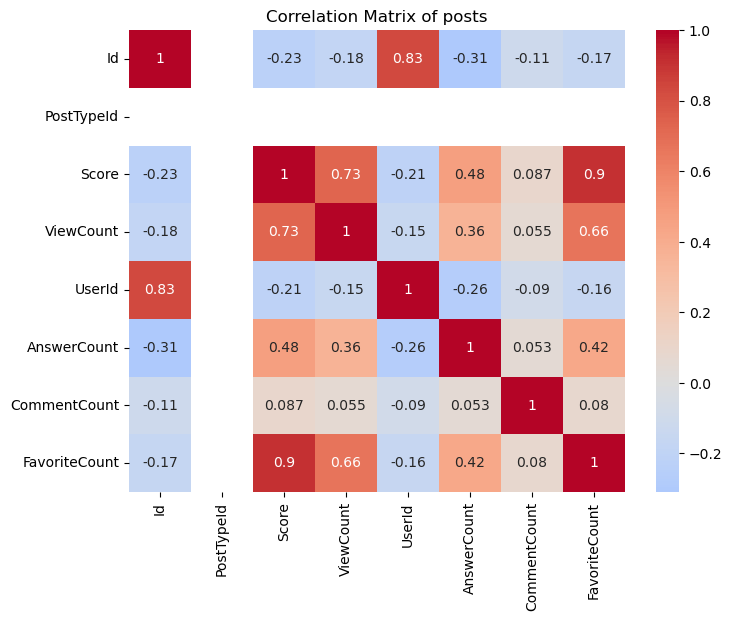

In [36]:
# Correlation matrix for numerical columns 
posts_corr = posts.select_dtypes(include=['int64']).corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(posts_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of posts')
plt.show()

- The correlation matrix shows that "Score" and "FavouriteCount" are highly correlated, meaning they tend to increase or decrease together.

In [37]:
# save the cleaned posts DataFrame to a new CSV file
posts.to_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Posts_cleaned.csv", index=False)
print("Posts cleaned and saved to Posts_cleaned.csv")

Posts cleaned and saved to Posts_cleaned.csv


6. `Tags file`

In [38]:
# Read the Tags CSV file
tags = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Tags.csv")
tags

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,definitions,35,105.0,104.0
1,2,machine-learning,9519,4909.0,4908.0
2,3,bigdata,451,66.0,65.0
3,5,data-mining,1087,80.0,79.0
4,6,databases,91,8960.0,8959.0
...,...,...,...,...,...
643,1099,ethics,1,NaN,NaN
644,1100,flask,2,NaN,NaN
645,1101,sqlalchemy,1,NaN,NaN
646,1102,rasa,1,NaN,NaN


In [39]:
# check the info of the tags dataframe
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             648 non-null    int64  
 1   TagName        648 non-null    object 
 2   Count          648 non-null    int64  
 3   ExcerptPostId  299 non-null    float64
 4   WikiPostId     299 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 25.4+ KB


- The `tags.info()` output reveals that two columns have missing values and I will drop them as they are non-essential for our analysis.

In [40]:
# Drop irrelevant columns
tags.drop(columns=['ExcerptPostId', 'WikiPostId'], inplace=True)

# check for unique values in the tags dataframe
print(f"Number of unique rows: \n{tags.nunique()}")

# Check for duplicate values in the tags dataframe
print(f"Number of duplicate rows: {tags.duplicated().sum()}\n")

Number of unique rows: 
Id         648
TagName    648
Count      208
dtype: int64
Number of duplicate rows: 0



In [41]:
# save the cleaned tags DataFrame to a new CSV file
tags.to_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Tags_cleaned.csv", index=False)
print("Tags cleaned and saved to Tags_cleaned.csv")

Tags cleaned and saved to Tags_cleaned.csv


7. `Users file`

In [42]:
# Read the Users CSV file
users = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Users.csv")
users

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId
0,-1,1,2014-05-13T21:29:22.820,Community,2014-05-13T21:29:22.820,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",189,825,1757,-1.0
1,1,101,2014-05-13T22:58:54.810,Adam Lear,2021-06-04T19:34:41.850,NaN,"New York, NY",\n<p>Developer at Stack Overflow focusing on p...,714,0,0,37099.0
2,2,101,2014-05-13T22:59:19.787,Geoff Dalgas,2019-09-03T19:10:22.217,http://stackoverflow.com,"Corvallis, OR",<p>Dev #2 who helped create Stack Overflow cur...,9,0,0,2.0
3,3,101,2014-05-13T23:15:34.483,hichris123,2020-12-16T17:41:49.610,NaN,NaN,<p>I'm a student interested in technology.</p>...,8,1,3,3046327.0
4,4,101,2014-05-13T23:16:09.937,Ben Collins,2014-08-04T15:25:54.810,http://benjamincollins.com,Republic of Texas,"<p>I work with <a href=""https://olo.com"" rel=""...",9,0,0,2365.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104889,124897,103,2021-09-04T18:19:47.213,mirekphd,2021-09-04T18:19:47.213,https://hub.docker.com/r/mirekphd,EU,<p>In my data scientist hat I work in python o...,0,2,0,13802251.0
104890,124898,1,2021-09-04T19:03:01.663,Albert O. Snow,2021-09-04T19:03:01.663,https://medium.com/@albertsnow_5148/dr-albert-...,NaN,<p>Phone: (508) 244-1815</p>\n<p>Albert O. Sno...,1,0,0,22650339.0
104891,124899,101,2021-09-04T21:01:28.230,sean,2021-09-04T21:01:28.230,https://gandalf.financial/,"Austin, TX, USA","<p>Former Commodities Analyst, Programmer, Phi...",0,0,0,4212542.0
104892,124900,1,2021-09-04T21:19:03.040,issac mohib,2021-09-04T21:19:03.040,NaN,NaN,NaN,0,0,0,22658490.0


In [43]:
# check the info of the users dataframe
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104894 entries, 0 to 104893
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              104894 non-null  int64  
 1   Reputation      104894 non-null  int64  
 2   CreationDate    104894 non-null  object 
 3   DisplayName     104886 non-null  object 
 4   LastAccessDate  104894 non-null  object 
 5   WebsiteUrl      16797 non-null   object 
 6   Location        44398 non-null   object 
 7   AboutMe         30413 non-null   object 
 8   Views           104894 non-null  int64  
 9   UpVotes         104894 non-null  int64  
 10  DownVotes       104894 non-null  int64  
 11  AccountId       104889 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 9.6+ MB


- The "User" file is a key dataset, but it contains missing values in 5 columns. Upon evaluation, 3 of these columns are deemed non-essential and will be dropped. For the remaining columns with missing values, null categorical values will be imputed with "Unknown" to preserve data integrity and facilitate future analysis.

In [44]:
# Check description of the users dataframe
users.describe()

,Id,Reputation,Views,UpVotes,DownVotes,AccountId
count,104894.000000,104894.000000,104894.000000,104894.000000,104894.000000,1.048890e+05
mean,64512.704540,50.505863,1.602055,1.352823,0.130980,9.129281e+06
std,34464.302145,198.633639,25.128016,26.650314,10.412514,6.178911e+06
min,-1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000e+00
25%,35445.250000,1.000000,0.000000,0.000000,0.000000,3.774631e+06
50%,65041.500000,1.000000,0.000000,0.000000,0.000000,8.545877e+06
75%,94497.750000,101.000000,0.000000,0.000000,0.000000,1.410876e+07
max,124901.000000,25908.000000,3463.000000,4825.000000,2175.000000,2.265849e+07


In [45]:
# Drop irrelevant columns
users.drop(columns=['WebsiteUrl', 'Location', 'AccountId'], inplace=True)

# Convert date columns to datetime
users['CreationDate'] = pd.to_datetime(users['CreationDate'])
users['LastAccessDate'] = pd.to_datetime(users['LastAccessDate'])

# Replace Nan values in displayname and aboutme with unknown
users['DisplayName'] = users['DisplayName'].fillna('unknown')
users['AboutMe'] = users['AboutMe'].fillna('unknown')

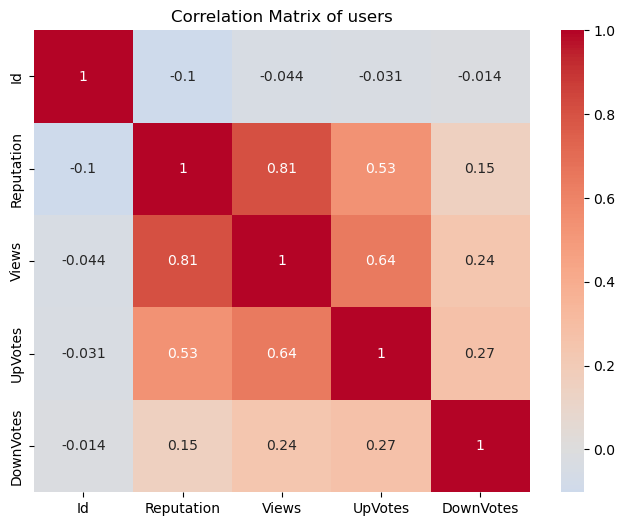

In [46]:
# Correlation matrix for numerical columns 
users_corr = users.select_dtypes(include=['int64']).corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))  
sns.heatmap(users_corr, 
            annot=True, 
            cmap='coolwarm', 
            center=0)  
plt.title('Correlation Matrix of users')
plt.show()

- The correlation matrix reveals a correlation between the "Views" and "Reputation" features, indicating that they are interrelated and may be influenced by each other.
- The correlation matrix also shows that "Upvotes" is moderately correlated with both "Views" and "Reputation", although the correlation is weaker compared to the strong correlation between "Views" and "Reputation".

In [47]:
# save the cleaned users DataFrame to a new CSV file
users.to_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Users_cleaned.csv", index=False)
print("Users cleaned and saved to Users_cleaned.csv")

Users cleaned and saved to Users_cleaned.csv


8. `Votes file`

In [48]:
# Read the Votes CSV file
votes = pd.read_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Votes.csv")
votes

,Id,PostId,VoteTypeId,CreationDate
0,1,1,2,2014-05-13T00:00:00.000
1,2,1,2,2014-05-13T00:00:00.000
2,3,3,2,2014-05-13T00:00:00.000
3,5,3,2,2014-05-13T00:00:00.000
4,6,1,2,2014-05-13T00:00:00.000
...,...,...,...,...
205951,243574,101777,1,2021-09-04T00:00:00.000
205952,243575,89357,5,2021-09-05T00:00:00.000
205953,243577,72351,5,2021-09-05T00:00:00.000
205954,243578,101811,2,2021-09-05T00:00:00.000


In [49]:
# check the info of the votes dataframe
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205956 entries, 0 to 205955
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Id            205956 non-null  int64 
 1   PostId        205956 non-null  int64 
 2   VoteTypeId    205956 non-null  int64 
 3   CreationDate  205956 non-null  object
dtypes: int64(3), object(1)
memory usage: 6.3+ MB


In [50]:
# Drop irrelevant columns
votes.drop(columns=['CreationDate'], inplace=True)

# Check for unique values in the votes dataframe
print(f"Number of unique rows: \n{votes.nunique()}")

# check for duplicate values in the votes dataframe
print(f"Number of duplicate rows: {votes.duplicated().sum()}\n")

Number of unique rows: 
Id            205956
PostId         63220
VoteTypeId        12
dtype: int64
Number of duplicate rows: 0



- The "CreationDate" feature has been dropped as it is deemed irrelevant to the analysis of votes, and its inclusion does not add significant value to the understanding of voting patterns.

In [51]:
# save the cleaned votes DataFrame to a new CSV file
votes.to_csv(r"E:\UF MSADS\SEM 2-2025\IDS\cap5771sp25-project-\Data\csv_output\Votes_cleaned.csv", index=False)
print("Votes cleaned and saved to Votes_cleaned.csv")

Votes cleaned and saved to Votes_cleaned.csv


---

### ♻️**Exploratory Data Analysis (EDA)** 

---

### **Outlier detections** 🔍


 Analyzing outliers in posts

 Column: Score
- IQR Outliers: 2123 (7.00%)
- Z-score Outliers: 275 (0.91%)


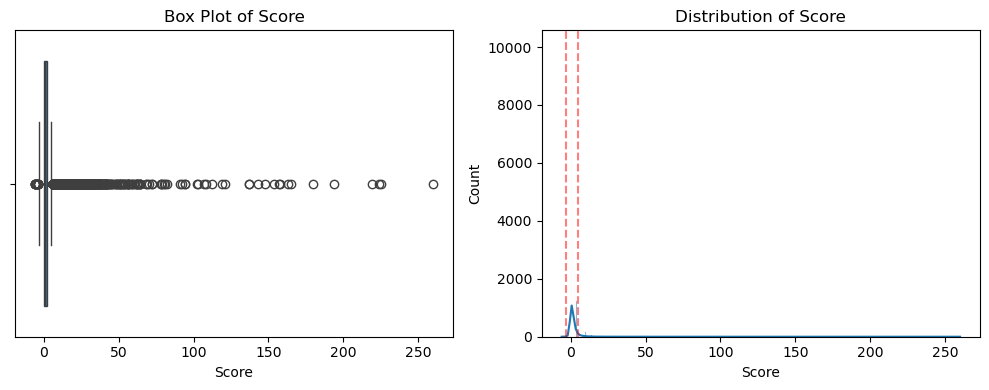


 Summary Statistics:
- Mean: 2.10
- Median: 1.00
- Std Dev: 6.05
- Range: [-6.00, 260.00]

 Column: ViewCount
- IQR Outliers: 4433 (14.61%)
- Z-score Outliers: 303 (1.00%)


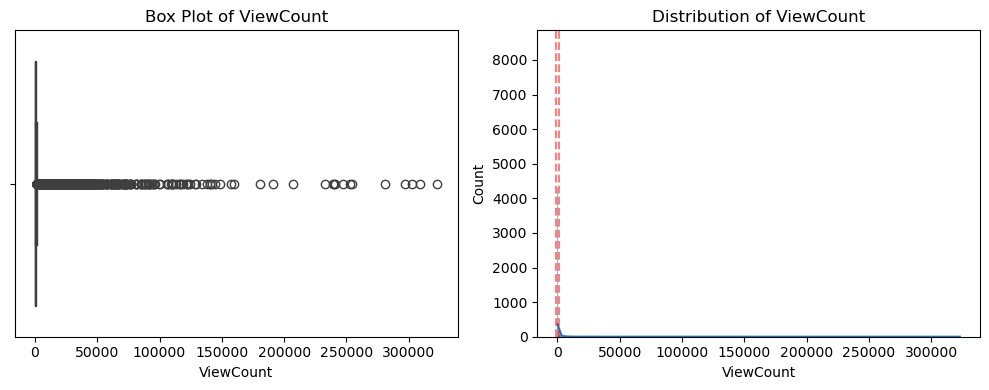


 Summary Statistics:
- Mean: 1684.48
- Median: 131.00
- Std Dev: 8750.85
- Range: [3.00, 323031.00]

 Column: AnswerCount
- IQR Outliers: 2259 (7.45%)
- Z-score Outliers: 319 (1.05%)


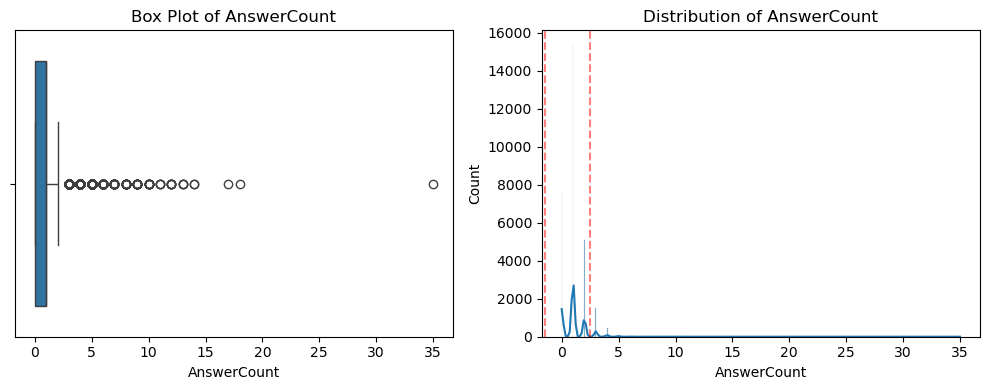


 Summary Statistics:
- Mean: 1.12
- Median: 1.00
- Std Dev: 1.05
- Range: [0.00, 35.00]

 Column: CommentCount
- IQR Outliers: 1059 (3.49%)
- Z-score Outliers: 668 (2.20%)


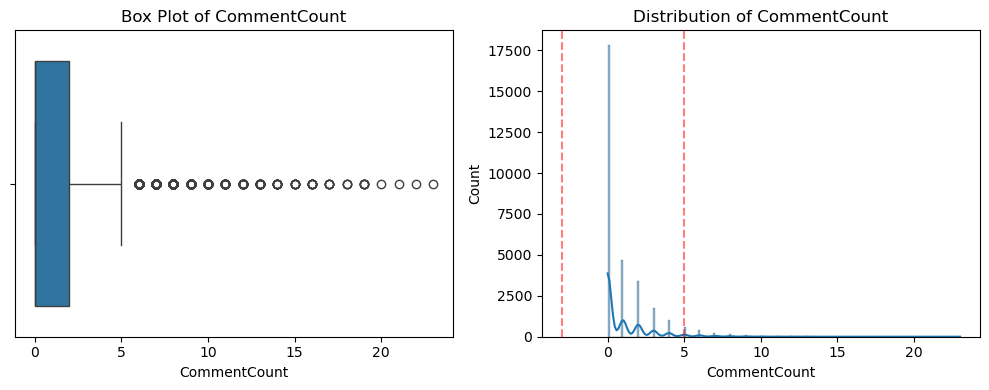


 Summary Statistics:
- Mean: 1.06
- Median: 0.00
- Std Dev: 1.85
- Range: [0.00, 23.00]

 Column: FavoriteCount
- IQR Outliers: 7514 (24.77%)
- Z-score Outliers: 219 (0.72%)


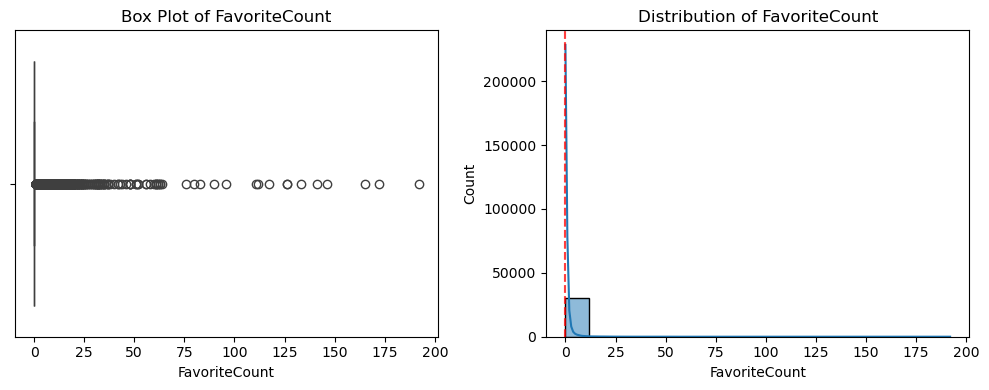


 Summary Statistics:
- Mean: 0.69
- Median: 0.00
- Std Dev: 3.86
- Range: [0.00, 192.00]

 Analyzing outliers in Users

 Column: Reputation
- IQR Outliers: 1395 (1.33%)
- Z-score Outliers: 418 (0.40%)


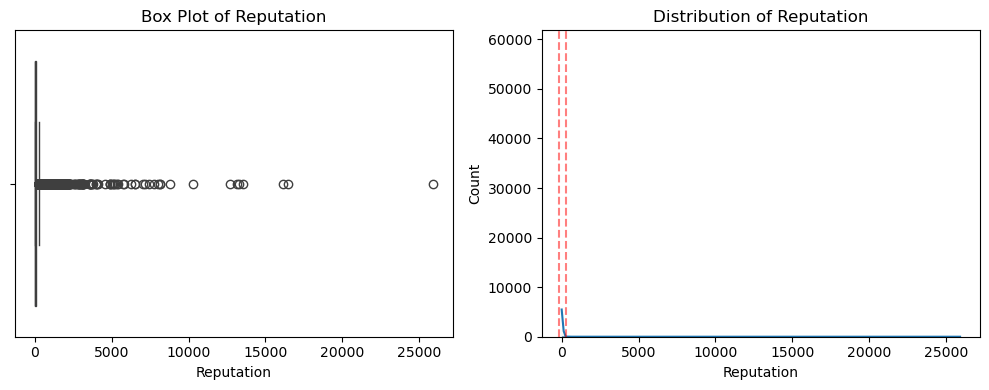


 Summary Statistics:
- Mean: 50.51
- Median: 1.00
- Std Dev: 198.63
- Range: [1.00, 25908.00]

 Column: Views
- IQR Outliers: 25598 (24.40%)
- Z-score Outliers: 226 (0.22%)


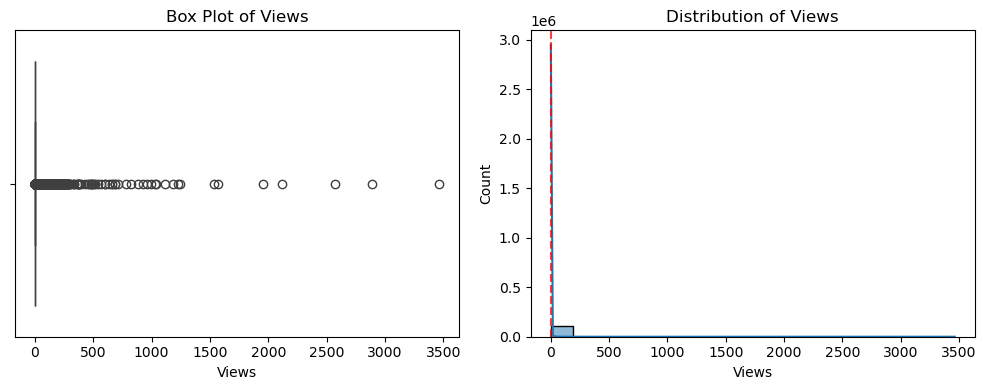


 Summary Statistics:
- Mean: 1.60
- Median: 0.00
- Std Dev: 25.13
- Range: [0.00, 3463.00]

 Column: UpVotes
- IQR Outliers: 16967 (16.18%)
- Z-score Outliers: 185 (0.18%)


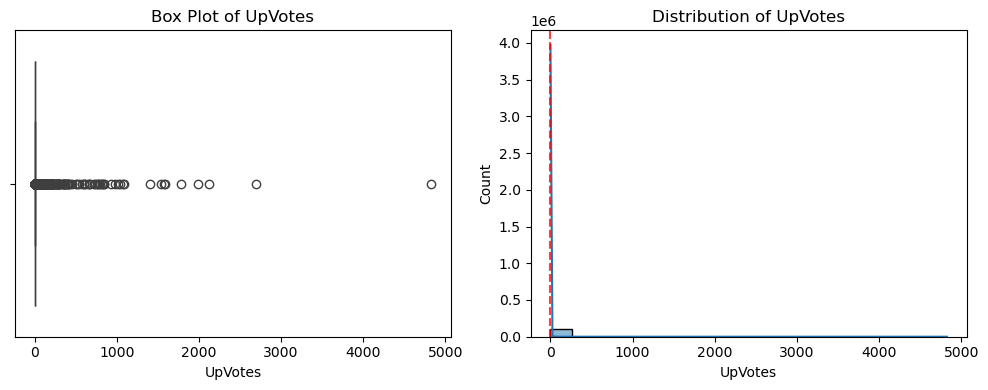


 Summary Statistics:
- Mean: 1.35
- Median: 0.00
- Std Dev: 26.65
- Range: [0.00, 4825.00]

 Column: DownVotes
- IQR Outliers: 759 (0.72%)
- Z-score Outliers: 47 (0.04%)


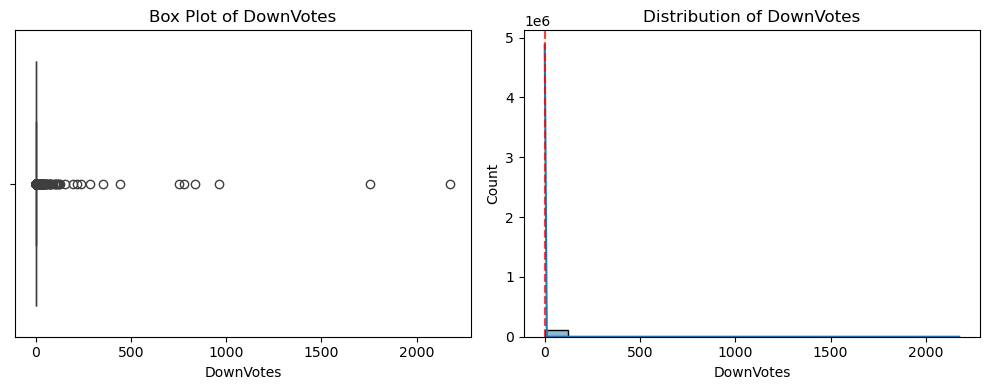


 Summary Statistics:
- Mean: 0.13
- Median: 0.00
- Std Dev: 10.41
- Range: [0.00, 2175.00]

 Analyzing outliers in Comments

 Column: Score
- IQR Outliers: 10978 (16.33%)
- Z-score Outliers: 852 (1.27%)


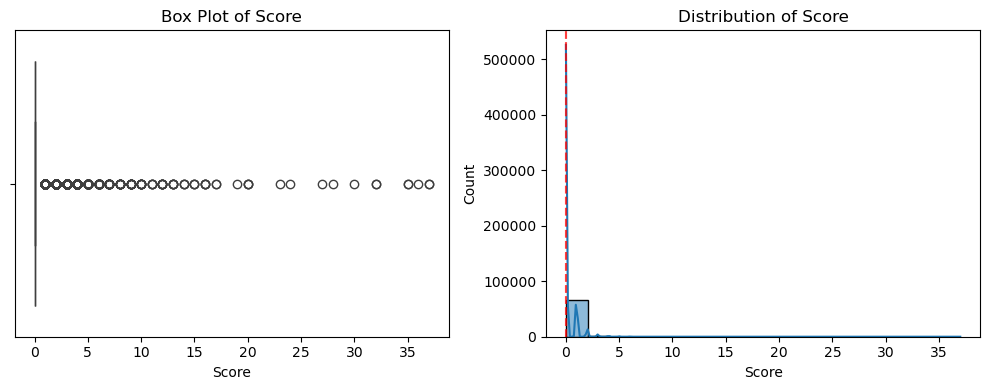


 Summary Statistics:
- Mean: 0.23
- Median: 0.00
- Std Dev: 0.81
- Range: [0.00, 37.00]

 Analyzing outliers in Tags

 Column: Count
- IQR Outliers: 94 (14.51%)
- Z-score Outliers: 9 (1.39%)


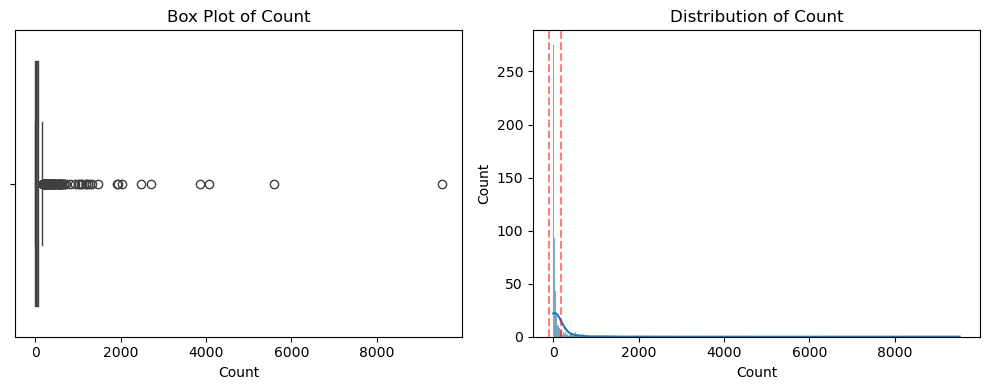


 Summary Statistics:
- Mean: 142.49
- Median: 22.00
- Std Dev: 547.98
- Range: [1.00, 9519.00]


In [41]:
def detect_outliers(df, table_name):
    """
    Detect outliers in numerical columns using multiple methods
    Args:
        df: pandas DataFrame
        table_name: name of the table for reporting
    """
    print(f"\n Analyzing outliers in {table_name}")
    print("=" * 50)
    
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numerical_cols:
        # Skip Id columns
        if 'id' in col.lower():
            continue
            
        # Calculate statistics
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # IQR method
        outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        # Z-score method
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers_zscore = df[col][z_scores > 3]
        
        if len(outliers_iqr) > 0 or len(outliers_zscore) > 0:
            print(f"\n Column: {col}")
            print(f"- IQR Outliers: {len(outliers_iqr)} ({(len(outliers_iqr)/len(df)*100):.2f}%)")
            print(f"- Z-score Outliers: {len(outliers_zscore)} ({(len(outliers_zscore)/len(df)*100):.2f}%)")
            
            # Create box plot
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            sns.boxplot(x=df[col])
            plt.title(f'Box Plot of {col}')
            
            # Create distribution plot
            plt.subplot(1, 2, 2)
            sns.histplot(df[col], kde=True)
            plt.axvline(lower_bound, color='r', linestyle='--', alpha=0.5)
            plt.axvline(upper_bound, color='r', linestyle='--', alpha=0.5)
            plt.title(f'Distribution of {col}')
            plt.tight_layout()
            plt.show()
            
            # Summary statistics
            print("\n Summary Statistics:")
            print(f"- Mean: {df[col].mean():.2f}")
            print(f"- Median: {df[col].median():.2f}")
            print(f"- Std Dev: {df[col].std():.2f}")
            print(f"- Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
            print("=" * 50)

# Apply to all available tables
tables = {
    'posts': posts,
    'Users': users,
    'Comments': comments,
    'Tags': tags,
}

for table_name, df in tables.items():
    detect_outliers(df, table_name)

💭**Insights on outliers:**  
An examination of the data has revealed the presence of outliers, which are data points that deviate significantly from the normal distribution. These outliers may indicate anomalous behavior, errors in data collection, or interesting patterns that warrant further investigation

`Score` Column interpretation:
- The data shows a right-skewed distribution, with most posts having low scores (median = 1.00) and a few posts having very high scores (up to 260.00).
- The presence of outliers (both IQR and Z-score) indicates that there are posts with scores significantly higher or lower than the majority.
- The high standard deviation and wide range suggest significant variability in post scores, with some posts performing much better or worse than others.

This data implies that while most posts have low engagement or scores, there are a few outliers that perform exceptionally well or poorly. The skewness and variability highlight the uneven distribution of post performance, which could be useful for identifying trends or anomalies in post engagement.

`ViewCount` column interpretation:
- The data shows a right-skewed distribution, with most posts having relatively low view counts (median = 131.00) and a few posts having very high view counts (up to 323031.00).
- The presence of outliers (both IQR and Z-score) indicates that there are posts with view counts significantly higher than the majority.
- The high standard deviation and wide range suggest significant variability in post view counts, with some posts being much more popular than others.

This data implies that while most posts have relatively low view counts, there are a few outliers that are extremely popular, attracting a large number of views. The skewness and variability highlight the uneven distribution of post popularity, which could be useful for identifying trends or anomalies in post engagement and visibility.

`AnswerCount` column interpretation:
- The data shows a slightly right-skewed distribution, with most posts having 1 answer (median = 1.00) and a few posts having a significantly higher number of answers (up to 35.00).
- The presence of outliers (both IQR and Z-score) indicates that there are posts with an unusually high number of answers, which could be due to high engagement or controversy.
- The moderate standard deviation and wide range suggest variability in the number of answers per post, with some posts attracting much more attention than others.

This data implies that while most posts receive around one answer, there are a few outliers that attract a significantly higher number of answers. The skewness and variability highlight the uneven distribution of post engagement, which could be useful for identifying trends or anomalies in how posts are interacted with.

`CommentCount` column interpretation:
- The data shows a right-skewed distribution, with most posts having 0 comments (median = 0.00) and a few posts having a significantly higher number of comments (up to 23.00).
- The presence of outliers (both IQR and Z-score) indicates that there are posts with an unusually high number of comments, which could be due to high engagement or controversy.
- The higher standard deviation and wide range suggest variability in the number of comments per post, with some posts attracting much more discussion than others.

This data implies that while most posts receive few or no comments, there are a few outliers that attract a significantly higher number of comments. The skewness and variability highlight the uneven distribution of post engagement, which could be useful for identifying trends or anomalies in how posts are interacted with.

`FavouriteCount` column interpretation:
- The data shows a right-skewed distribution, with most posts having 0 favorites (median = 0.00) and a few posts having a significantly higher number of favorites (up to 192.00).
- The presence of outliers (both IQR and Z-score) indicates that there are posts with an unusually high number of favorites, which could be due to high popularity or exceptional quality.
- The higher standard deviation and wide range suggest variability in the number of favorites per post, with some posts being much more favored than others.

This data implies that while most posts receive few or no favorites, there are a few outliers that attract a significantly higher number of favorites. The skewness and variability highlight the uneven distribution of post popularity, which could be useful for identifying trends or anomalies in how posts are favored by users.

`Reputation` column interpretation:
- The data shows a right-skewed distribution, with most users having relatively low reputation scores (median = 1.00) and a few users having very high reputation scores (up to 25908.00).
- The presence of outliers (both IQR and Z-score) indicates that there are users with reputation scores significantly higher than the majority.
- The high standard deviation and wide range suggest significant variability in user reputation scores, with some users being much more reputable than others.

This data implies that while most users have low reputation scores, there are a few outliers with exceptionally high reputation scores. The skewness and variability highlight the uneven distribution of user reputation, which could be useful for identifying trends or anomalies in user engagement and contributions.

`Views` column interpretation:
- The data shows a right-skewed distribution, with most posts having 0 views (median = 0.00) and a few posts having a significantly higher number of views (up to 3463.00).
- The presence of outliers (both IQR and Z-score) indicates that there are posts with an unusually high number of views, which could be due to high popularity or visibility.
- The high standard deviation and wide range suggest significant variability in the number of views per post, with some posts being much more viewed than others.

This data implies that while most posts receive few or no views, there are a few outliers that attract a significantly higher number of views. The skewness and variability highlight the uneven distribution of post visibility, which could be useful for identifying trends or anomalies in how posts are viewed by users.

`Upvotes` column interpretation:
- The data shows a right-skewed distribution, with most posts having 0 upvotes (median = 0.00) and a few posts having a significantly higher number of upvotes (up to 4825.00).
- The presence of outliers (both IQR and Z-score) indicates that there are posts with an unusually high number of upvotes, which could be due to high popularity or quality.
- The high standard deviation and wide range suggest significant variability in the number of upvotes per post, with some posts being much more upvoted than others.

This data implies that while most posts receive few or no upvotes, there are a few outliers that attract a significantly higher number of upvotes. The skewness and variability highlight the uneven distribution of post popularity, which could be useful for identifying trends or anomalies in how posts are upvoted by users.

`Downvotes` column interpretation:
- The data shows a right-skewed distribution, with most posts having 0 downvotes (median = 0.00) and a few posts having a significantly higher number of downvotes (up to 2175.00).
- The presence of outliers (both IQR and Z-score) indicates that there are posts with an unusually high number of downvotes, which could be due to controversy or poor quality.
- The relatively high standard deviation and wide range suggest variability in the number of downvotes per post, with some posts being much more downvoted than others.

This data implies that while most posts receive no downvotes, there are a few outliers that attract a significantly higher number of downvotes. The skewness and variability highlight the uneven distribution of post unpopularity, which could be useful for identifying trends or anomalies in how posts are downvoted by users.

`Score` column interpretation:
- The data shows a right-skewed distribution, with most posts having 0 scores (median = 0.00) and a few posts having significantly higher scores (up to 37.00).
- The presence of outliers (both IQR and Z-score) indicates that there are posts with unusually high scores, which could be due to high engagement or quality.
- The relatively low standard deviation and wide range suggest that while most posts have low scores, there are some posts with much higher scores.

This data implies that while most posts have very low or no scores, there are a few outliers that attract significantly higher scores. The skewness and variability highlight the uneven distribution of post performance, which could be useful for identifying trends or anomalies in how posts are scored by users.

`Count` column interpretation:
- The data shows a right-skewed distribution, with most instances having relatively low counts (median = 22.00) and a few instances having significantly higher counts (up to 9519.00).
- The presence of outliers (both IQR and Z-score) indicates that there are instances with unusually high counts, which could be due to specific factors causing these instances to stand out.
- The high standard deviation and wide range suggest significant variability in the counts, with some instances being much more frequent or prominent than others.

This data implies that while most instances have low counts, there are a few outliers with exceptionally high counts. The skewness and variability highlight the uneven distribution of counts, which could be useful for identifying trends or anomalies in the data. Understanding these patterns can help in making data-driven decisions or further investigating the causes behind the high-count instances.

Identify Outliers Using IQR

In [42]:
# def detect_outliers_iqr(column):
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = column[(column < lower_bound) | (column > upper_bound)]
#     return outliers

# Detect outliers 
# outliers_view = detect_outliers_iqr(posts['ViewCount'])
# outliers_ans = detect_outliers_iqr(posts['AnswerCount'])
# outliers_com = detect_outliers_iqr(posts['CommentCount'])
# outliers_fav = detect_outliers_iqr(posts['FavoriteCount'])
# print(f"Outliers in ViewCount: {len(outliers_view)}")
# print(f"Outliers in AnswerCount: {len(outliers_ans)}")
# print(f"Outliers in CommentCount: {len(outliers_com)}")
# print(f"Outliers in FavoriteCount: {len(outliers_fav)}")

Identify Outliers Using Z-Score

In [43]:
# from scipy.stats import zscore

# def detect_outliers_zscore(column, threshold=3):
#     z_scores = zscore(column)
#     outliers = column[np.abs(z_scores) > threshold]
#     return outliers

# # Example: Detect outliers for Reputation
# outliers_reputation = detect_outliers_zscore(users['Reputation'])
# print(f"Outliers in Reputation: {len(outliers_reputation)}")

### **Visualizations** 📊 

**Patterns, Trends and Relationship:**

<Figure size 1200x800 with 0 Axes>

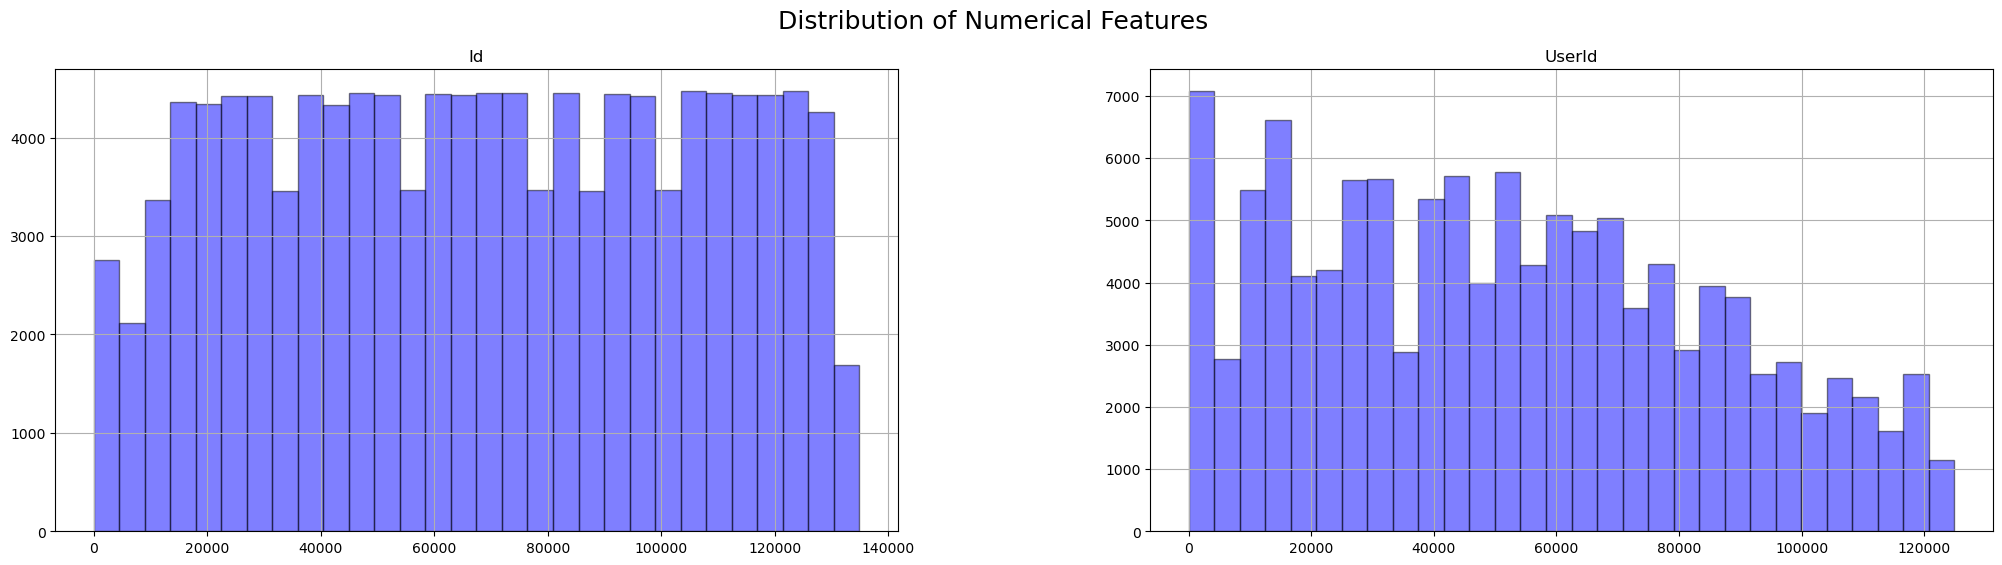

In [44]:
# Distribution of numerical variables in badges dataframe
plt.figure(figsize=(12, 8))
badges.hist(figsize=(25, 6), bins=30, edgecolor='black', color='b', alpha=0.5)
plt.suptitle("Distribution of Numerical Features", fontsize=18)
plt.show()

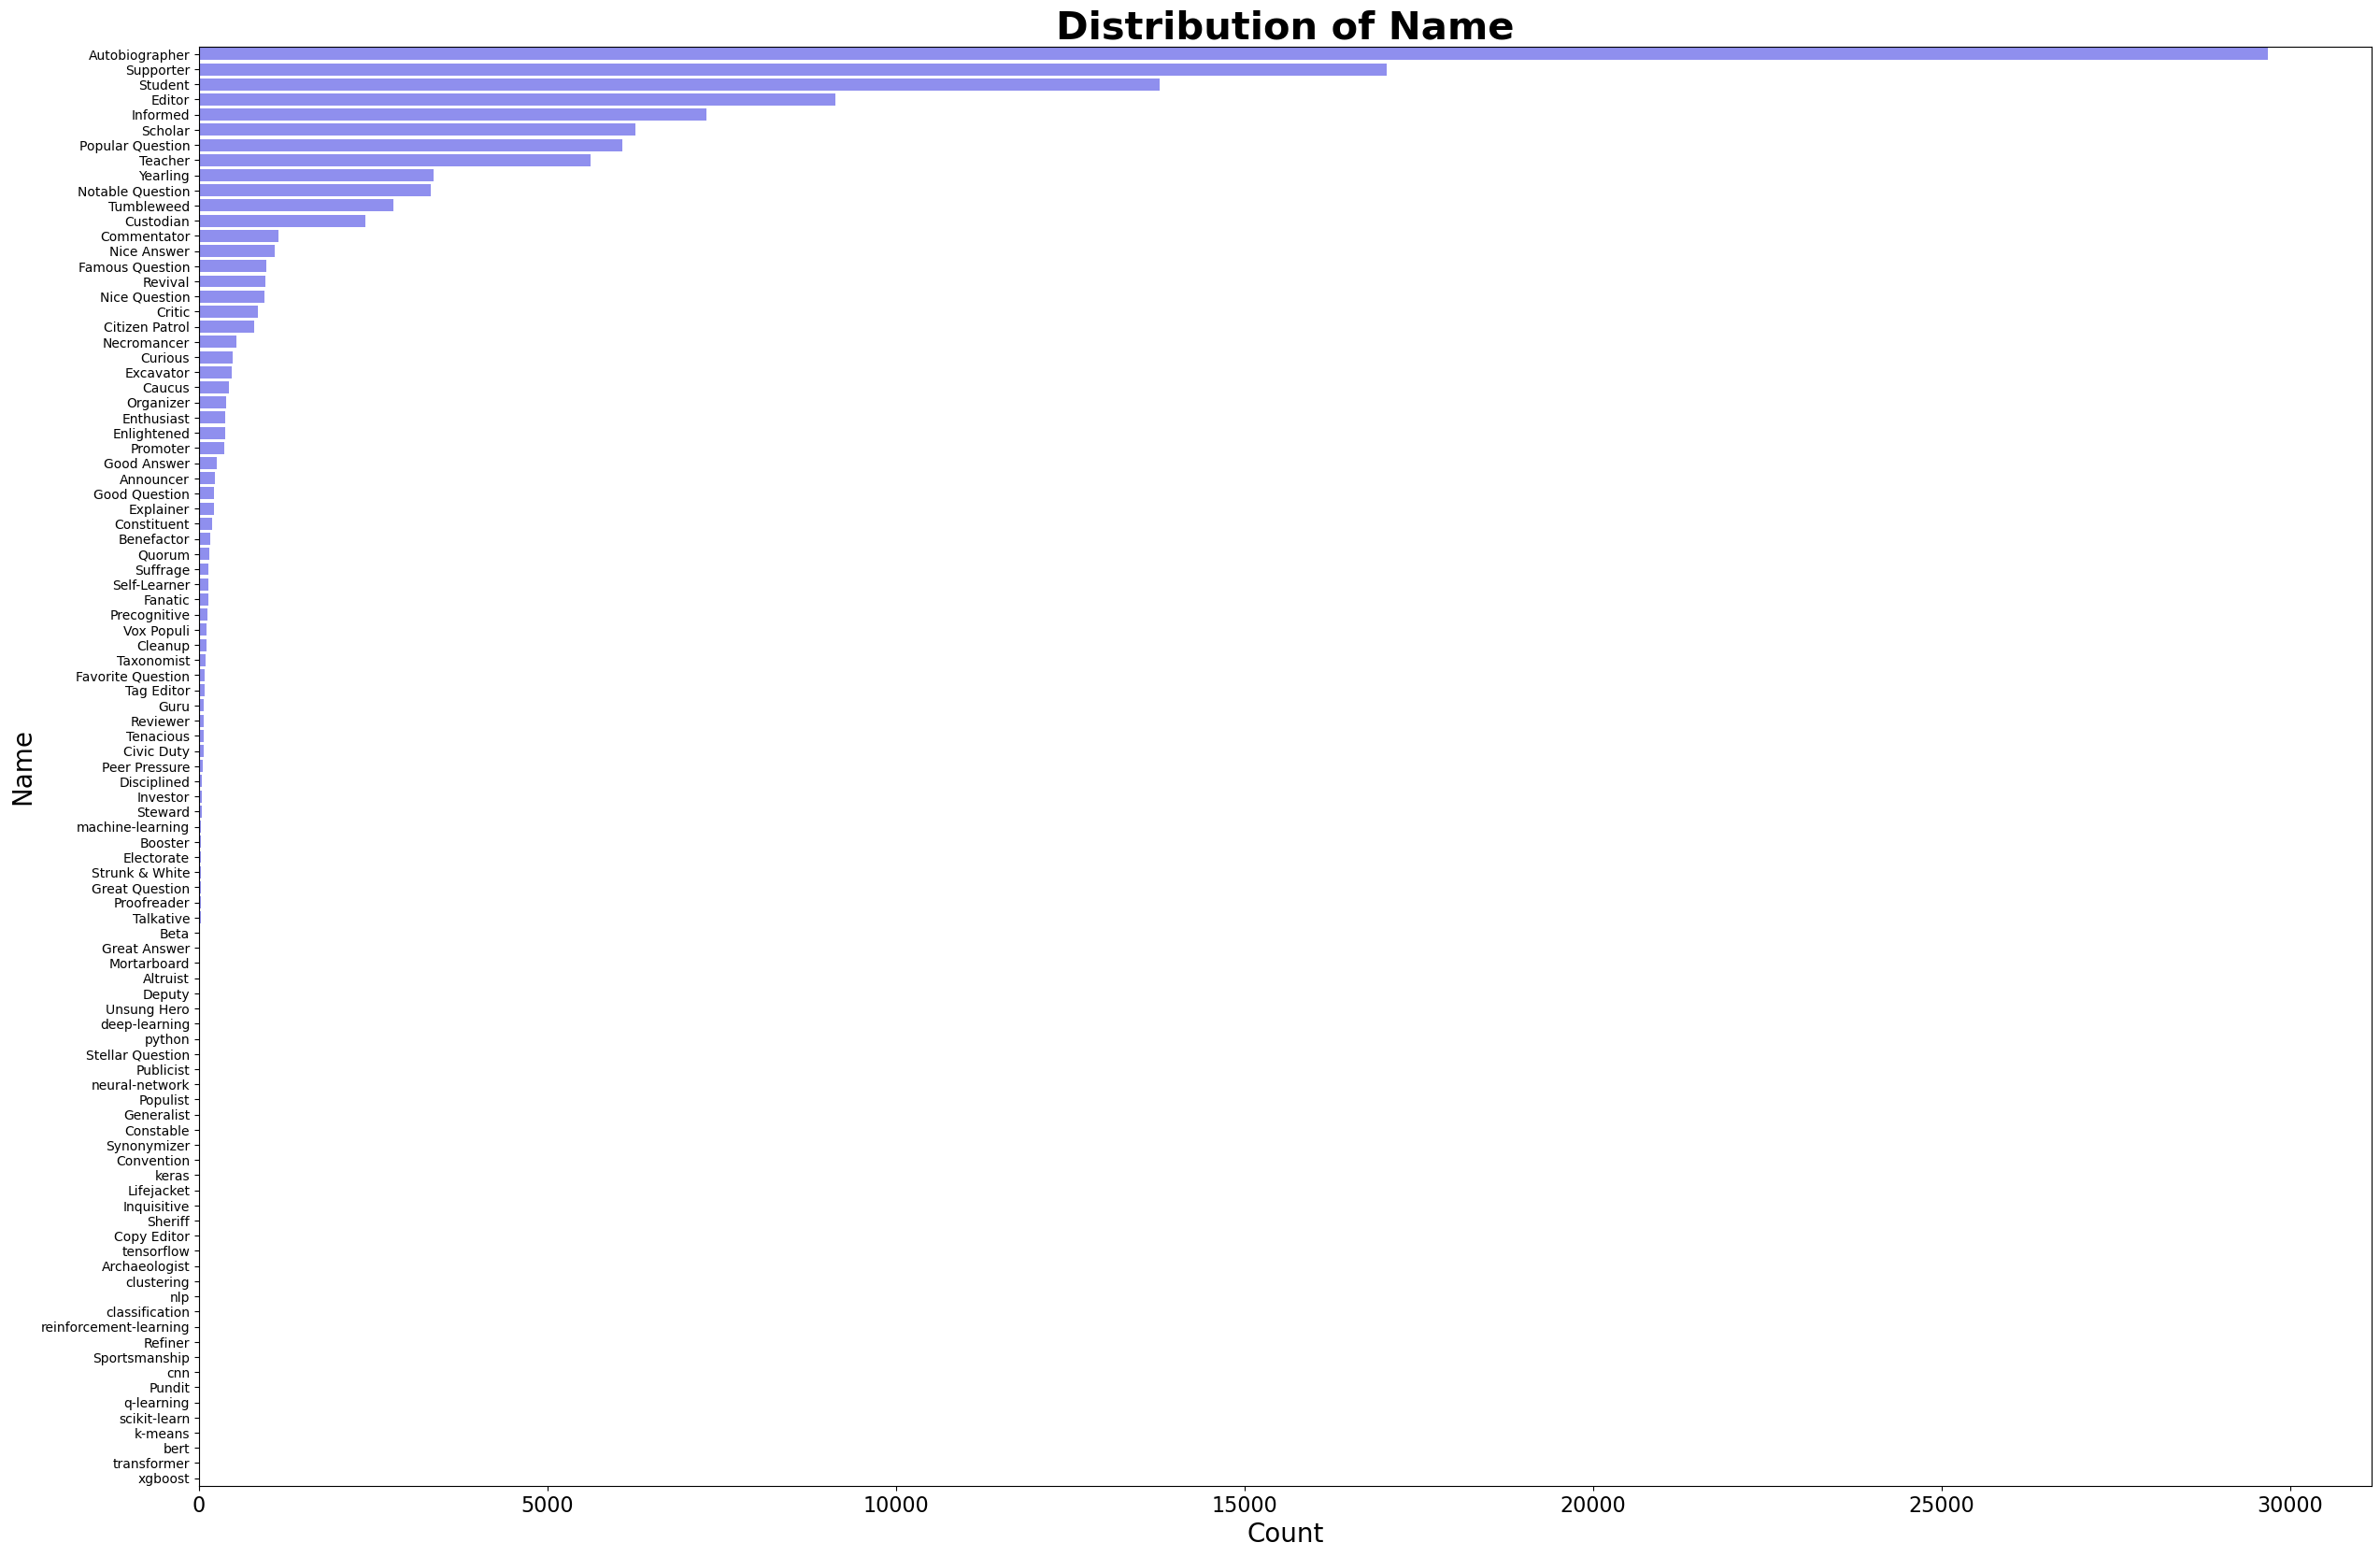

In [45]:
# Count plots for categorical features in badges dataframe
categorical_cols = badges.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(30, 20))
    sns.countplot(y=badges[col], order=badges[col].value_counts().index, color='b', alpha=0.5)
    plt.title(f"Distribution of {col}", fontsize=30, fontweight='bold')
    plt.xlabel("Count", fontsize=20)
    plt.xticks(fontsize=16)  
    plt.ylabel("Name", fontsize=20)
    plt.show()

- The count plot displays the distribution of Names, with Autobiographer emerging as the most frequently awarded Name of the badge, having the highest count among all Names.

<Figure size 1400x1000 with 0 Axes>

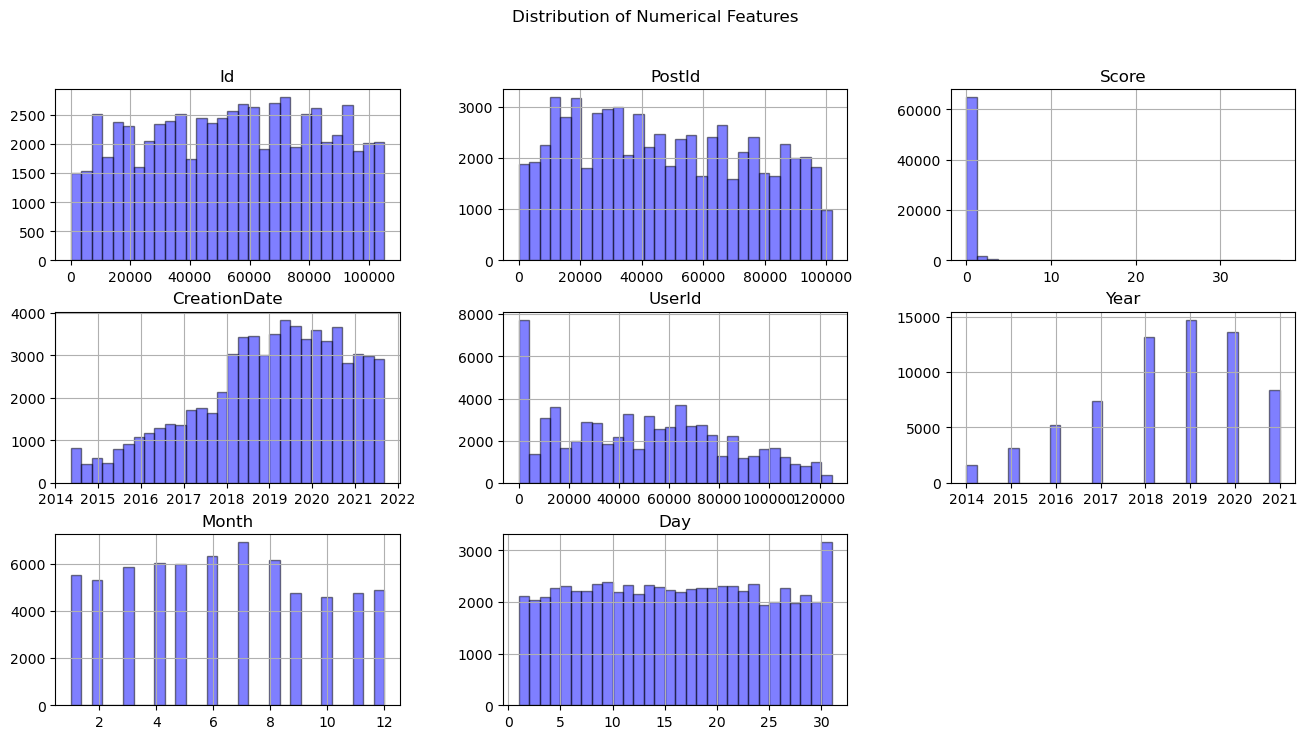

In [46]:
# Visualization: Distribution of numerical variables
plt.figure(figsize=(14, 10))
comments.hist(figsize=(16, 8), bins=30, edgecolor='black', color ='b', alpha=0.5)
plt.suptitle("Distribution of Numerical Features", fontsize=12)
plt.show()

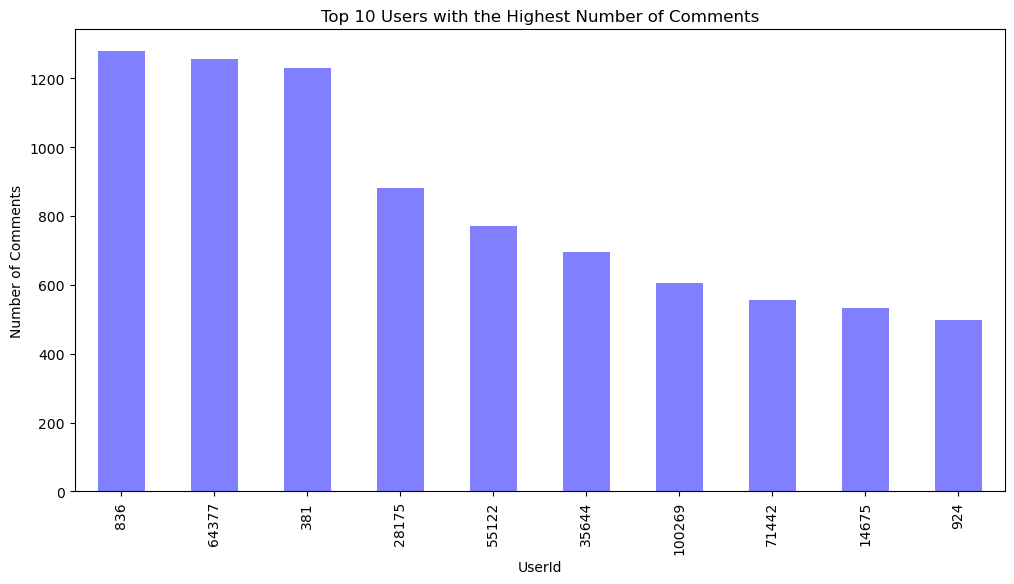

In [47]:
# Visualization: Highest number of comments per user
plt.figure(figsize=(12, 6))
comments['UserId'].value_counts().head(10).plot(kind='bar', color='b', alpha=0.5)
plt.title('Top 10 Users with the Highest Number of Comments')
plt.xlabel('UserId')
plt.ylabel('Number of Comments')
plt.show()

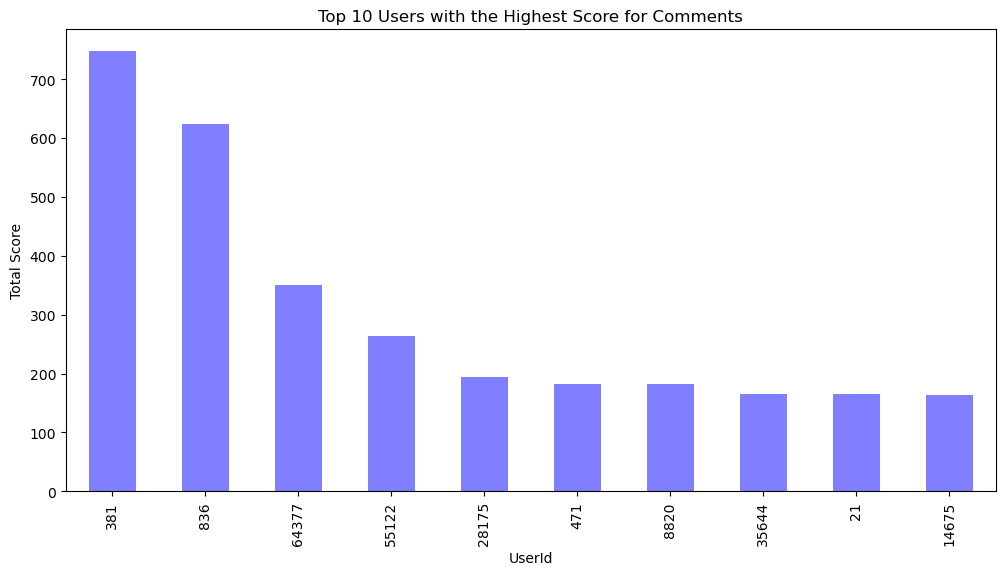

In [48]:
# Visualization: Highest score for the text by user
plt.figure(figsize=(12, 6))
comments.groupby('UserId')['Score'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='b', alpha=0.5)
plt.title('Top 10 Users with the Highest Score for Comments')
plt.xlabel('UserId')
plt.ylabel('Total Score')
plt.show()

- The plots reveal a strong correlation between the top users in the Comments plot and the top users in the Score plot, with the top 3 users appearing in both plots. This suggests a significant relationship between comment activity and score, implying that users who are highly active in commenting also tend to have higher scores.

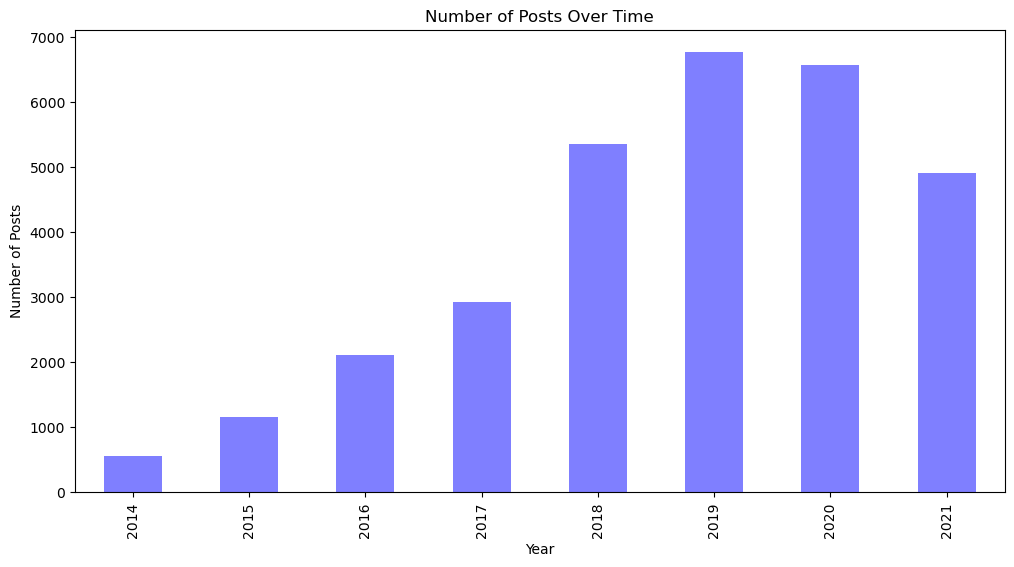

In [49]:
# Plot post activity over time
plt.figure(figsize=(12, 6))
posts['CreationDate'].dt.year.value_counts().sort_index().plot(kind='bar', color='b', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.title("Number of Posts Over Time")
plt.show()

- The plot shows a trend analysis of post frequency over the years, revealing that the peak year for posts was 2019, with a gradual increase from 2014 to 2019. However, there is a notable decline in post frequency in 2020 and an even steeper decline in 2021. Additionally, the plot highlights a significant surge in post frequency between 2017 and 2018, with the number of posts nearly doubling during this period.

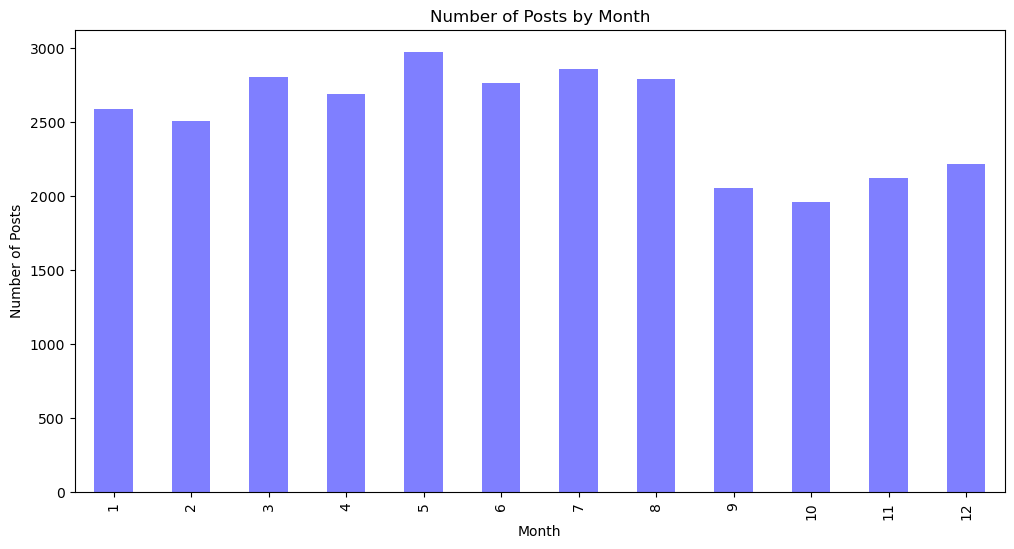

In [50]:
# Post activity by month
plt.figure(figsize=(12, 6))
posts['CreationDate'].dt.month.value_counts().sort_index().plot(kind='bar', color='b', alpha=0.5)
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.title("Number of Posts by Month")
plt.show()

- The plot reveals a seasonal trend in post frequency, with the top 5 months for posts being May, March, June, July, and August, indicating that these summer and spring months tend to have the highest volume of posts.

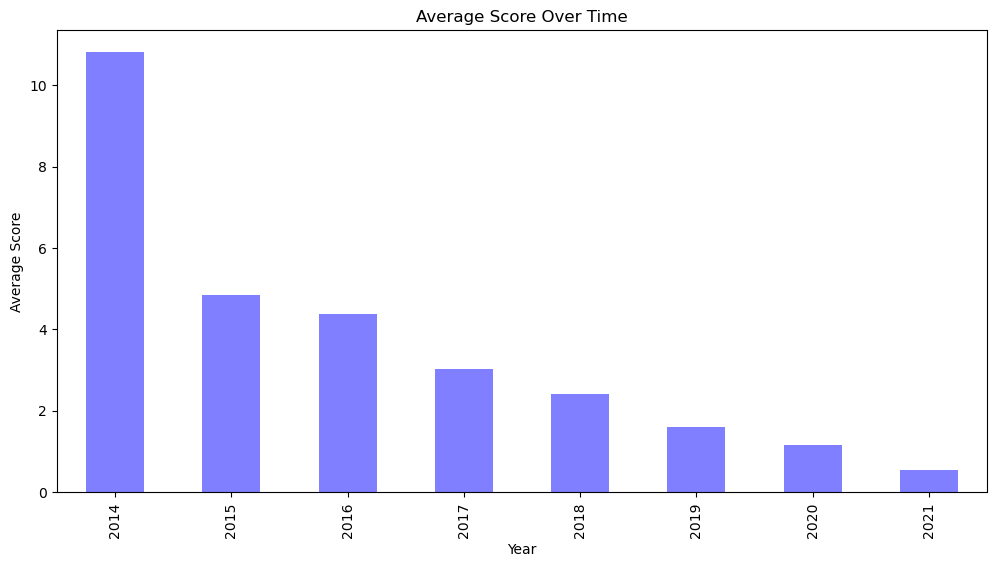

In [51]:
# Plot average score over time
plt.figure(figsize=(12, 6))
posts.groupby(posts['CreationDate'].dt.year)['Score'].mean().plot(kind='bar', color='b', alpha=0.5)
plt.title('Average Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

- The plot shows a trend analysis of average score over the years, revealing that the average score was highest (above 10) in 2014, but dropped significantly to around 5 in 2015. From then on, the average score has been gradually decreasing, with a steady decline to less than 2 in 2021.

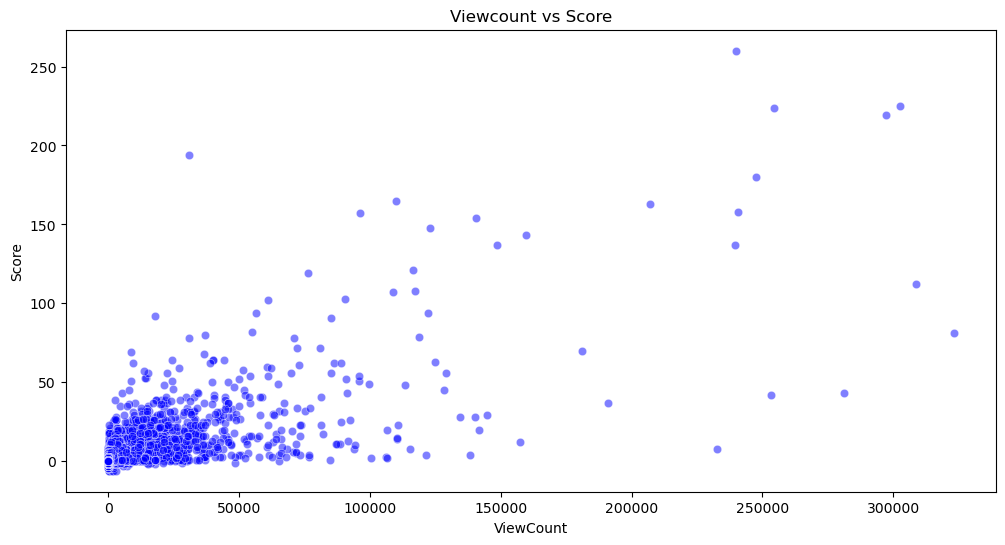

In [52]:
# Plot score vs view count
plt.figure(figsize=(12, 6))
sns.scatterplot(x=posts['ViewCount'], y=posts['Score'], color='b', alpha=0.5)
plt.title('Viewcount vs Score')
plt.show()

- This plot shows that a post's views and its score are related, but not exactly. Other factors like how relevant the content is, when it's posted, and what the audience likes also play a big role in how well a post does. Also, some posts that are very specific or go viral can still do very well, even if they don't follow the usual pattern.

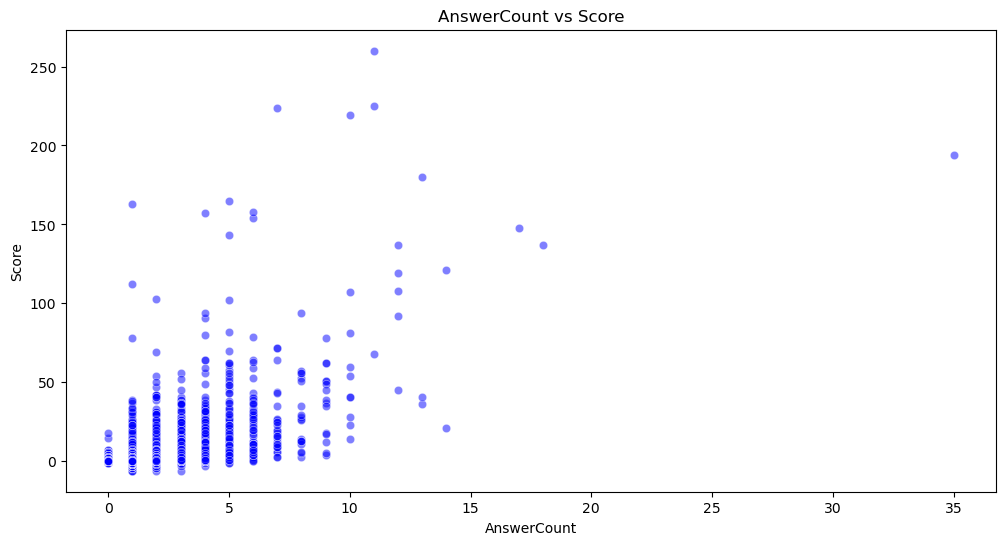

In [53]:
# Plot score vs answer count
plt.figure(figsize=(12, 6))
sns.scatterplot(x=posts['AnswerCount'], y=posts['Score'], color='b', alpha=0.5)
plt.title('AnswerCount vs Score')
plt.show()

- This plot illustrates a counterintuitive trend, where the number of answers does not necessarily determine a question's score or engagement. Instead, questions with a smaller number of high-quality answers (as measured by upvotes) can still achieve high scores, while questions with a large number of answers may remain low-scoring, suggesting that answer quality is a more significant factor than answer quantity in determining a question's overall value and engagement.

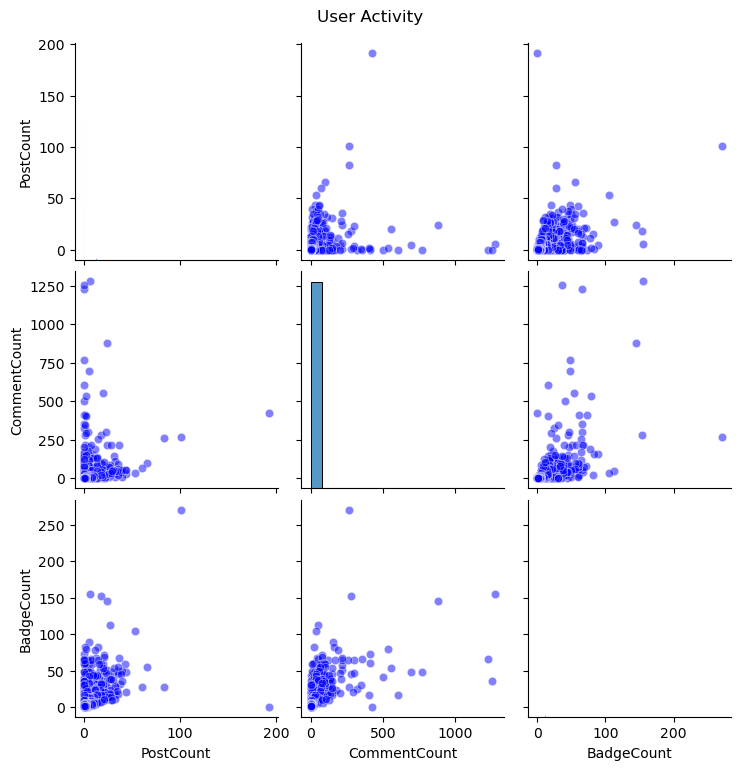

In [54]:
# Merge posts and comments on UserId
user_activity = posts.groupby('UserId').size().reset_index(name='PostCount')
user_activity = user_activity.merge(comments.groupby('UserId').size().reset_index(name='CommentCount'), left_on='UserId', right_on='UserId', how='outer')
user_activity = user_activity.merge(badges.groupby('UserId').size().reset_index(name='BadgeCount'), on='UserId', how='outer')

# Fill NaN values with 0
user_activity = user_activity.fillna(0)

# User activity
sns.pairplot(user_activity[['PostCount', 'CommentCount', 'BadgeCount']], 
             plot_kws={'color': 'blue', 'alpha': 0.5})
plt.suptitle('User Activity', y=1.02)
plt.show()

- This plot suggests that while user activity metrics (PostCount, CommentCount, and BadgeCount) are somewhat related, they do not strongly predict one another. Most users have low engagement levels across all metrics, but a small subset of highly active users skews the distributions and relationships.

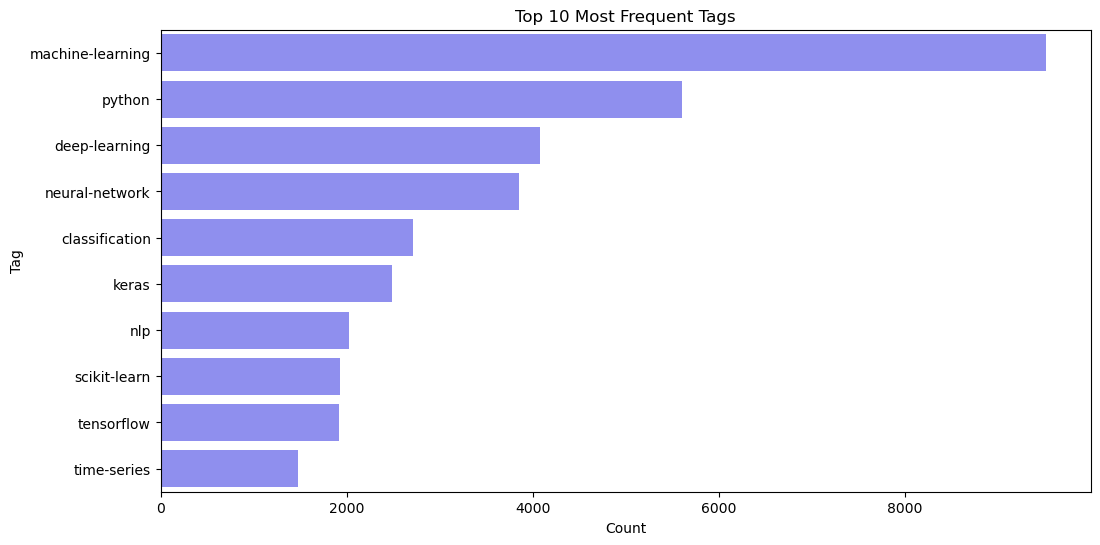

In [55]:
# Extract tags from the Tags column
tags = posts['Tags'].str.findall(r'<(.*?)>').explode()
tag_counts = Counter(tags)

# Plot the top 10 most frequent tags
plt.figure(figsize=(12, 6))
tag_counts.most_common(10)
sns.barplot(x=[count for tag, count in tag_counts.most_common(10)], y=[tag for tag, count in tag_counts.most_common(10)], color='b', alpha=0.5)
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

- The plot displays the top 10 tags, providing insight into the trending topics in the field of Data Science. This information can be used to identify popular areas of interest and emerging themes in the Data Science community.

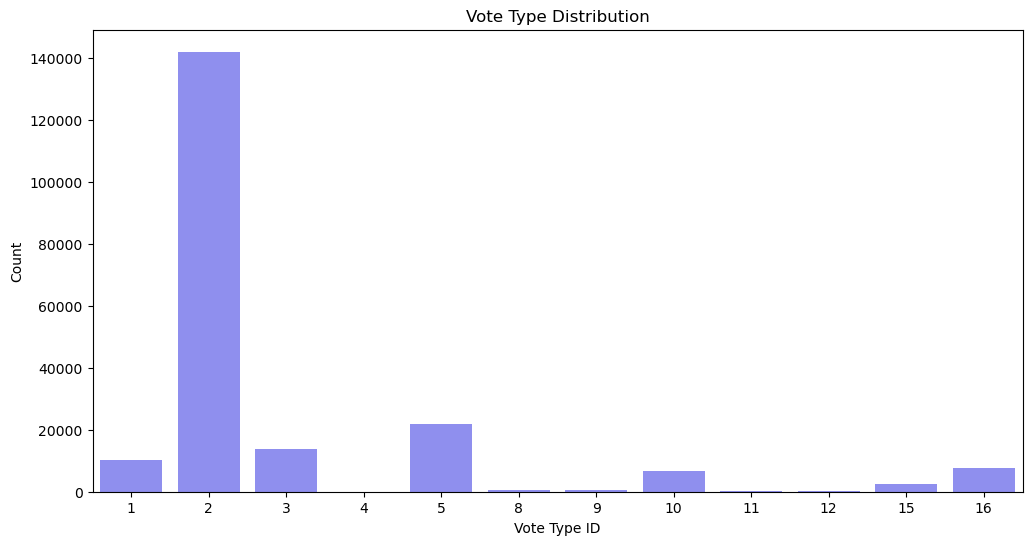

In [56]:
# Vote distribution
if 'VoteTypeId' in votes.columns:
    vote_counts = votes['VoteTypeId'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=vote_counts.index, y=vote_counts.values, color='b', alpha=0.5)
    plt.xlabel("Vote Type ID")
    plt.ylabel("Count")
    plt.title("Vote Type Distribution")
    plt.show()

In [57]:
vote_counts = votes['VoteTypeId'].value_counts()
pd.DataFrame(vote_counts)

,count
VoteTypeId,
2,141903
5,21898
3,13739
1,10226
16,7739
10,6589
15,2418
8,505
9,505


- The TXT file serves as a reference guide, providing a key to understanding the meaning of each VoteTypeId. Notably, the data reveals that VoteTypeId 2, which corresponds to an "Upmod" (upvote), has the highest frequency with a count of 141,903, indicating that upvotes are the most common type of vote.

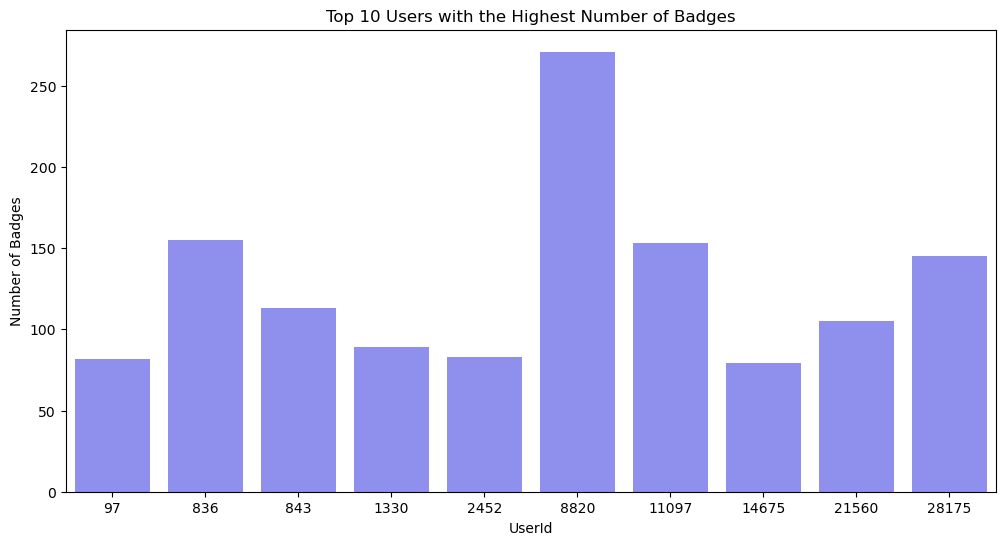

In [58]:
# Top 10 users with the highest number of badges
plt.figure(figsize=(12, 6))
sns.barplot(x=badges['UserId'].value_counts().head(10).index, y=badges['UserId'].value_counts().head(10).values, color='b', alpha=0.5)
plt.title('Top 10 Users with the Highest Number of Badges')
plt.xlabel('UserId')
plt.ylabel('Number of Badges')
plt.show()

- The plot highlights user 8820 as the top badge earner, with the highest number of badges awarded, indicating their exceptional contributions and engagement within the community.

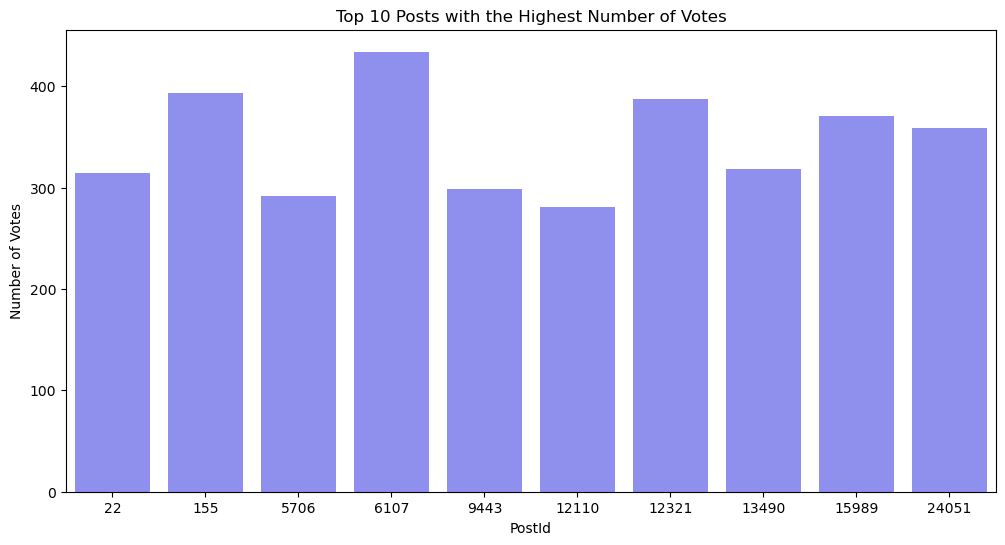

In [59]:
# Highest number of votes per post
plt.figure(figsize=(12, 6))
sns.barplot(x=votes['PostId'].value_counts().head(10).index, y=votes['PostId'].value_counts().head(10).values, color='b', alpha=0.5)
plt.title('Top 10 Posts with the Highest Number of Votes')
plt.xlabel('PostId')
plt.ylabel('Number of Votes')
plt.show()

- The plot showcases the top-performing posts, with post ID 6107 emerging as the clear winner with the highest number of votes, closely followed by post ID 155 and 12321, which also garnered significant community attention and approval, outpacing all other posts in terms of engagement and recognition.

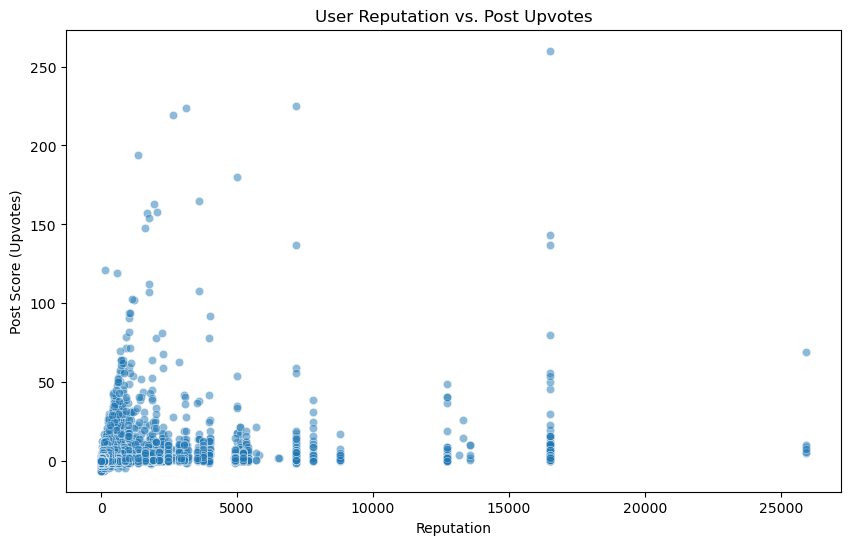

In [60]:
merged_df = pd.merge(users, posts, left_on='Id', right_on='UserId', suffixes=('_user', '_post'))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reputation', y='Score', data=merged_df, alpha=0.5)
plt.title('User Reputation vs. Post Upvotes')
plt.xlabel('Reputation')
plt.ylabel('Post Score (Upvotes)')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

- This plot reveals a complex relationship between user reputation and post score, indicating that while there may be some correlation, it is not a guarantee of success. Having a high reputation may offer some advantages, such as increased visibility or credibility, but the quality and relevance of individual posts are crucial factors in determining their upvote count. Furthermore, the presence of outliers suggests that both new and experienced users are capable of creating high-impact content, highlighting that merit and quality can sometimes trump reputation.

In [61]:
# Calculate post quality score (e.g., weighted sum of Score, ViewCount, CommentCount)
posts['QualityScore'] = posts['Score'] * 0.5 + posts['ViewCount'] * 0.3 + posts['CommentCount'] * 0.2

# Identify top 10 high-quality posts
top_posts = posts.nlargest(10, 'QualityScore')

# Analyze tags of high-quality posts
top_tags = top_posts['Tags'].str.extractall(r'<([^>]+)>')[0].value_counts()
print("Top Tags in High-Quality Posts:")
pd.DataFrame(top_tags)

Top Tags in High-Quality Posts:


,count
0,
python,3
pandas,2
deep-learning,2
scikit-learn,2
neural-network,2
random-forest,1
correlation,1
classification,1
statistics,1


### **Next Steps...**

In [ ]:
%pip install networkx

In [ ]:
# Network Analysis
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes (users and posts)
users = posts['UserId'].unique()
posts_ids = posts['Id'].unique()
G.add_nodes_from(users, bipartite=0)  # Users
G.add_nodes_from(posts_ids, bipartite=1)  # Posts

# Add edges (user-post interactions)
for _, row in posts.iterrows():
    G.add_edge(row['UserId'], row['Id'])

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Visualize the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=50, with_labels=False, alpha=0.6)
plt.title('User-Post Interaction Network')
plt.show()